**Env Preparation**

In [1]:
import pandas as pd
import random as rd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import pymannkendall as mk

#Set Seed
seed = 13

rd.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

**EDA (Exploratory Data Analysis)**

In [2]:
#Load Dataset
dataset_path = "Dataset/fmcg_personalcare/"
marketing_data = pd.read_csv(dataset_path + "marketing.csv")
products_data = pd.read_csv(dataset_path + "products.csv")
reviews_data = pd.read_csv(dataset_path + "reviews.csv")
sales_data = pd.read_csv(dataset_path + "sales.csv")

In [3]:
def data_information(data, name):
    print(name)
    print("=" * 40, '\n')
    print("Data Preview \n")
    print(data.head())
    print("=" * 40, '\n')
    print("Data Info \n")
    print(data.info())
    print("=" * 40, '\n')
    print("Data Description \n")
    print(data.describe())
    print("=" * 40, '\n')
    print("Data Size : ")
    print(data.shape)

In [4]:
data_information(marketing_data, "Marketing Data")

Marketing Data

Data Preview 

  campaign_id product_id     campaign_name  start_date    end_date  \
0      MKT001      PC010  Campaign_1_PC010  2020-10-12  2020-12-14   
1      MKT002      PC008  Campaign_2_PC008  2020-06-30  2020-08-29   
2      MKT003      PC006  Campaign_3_PC006  2021-09-01  2021-09-22   
3      MKT004      PC015  Campaign_4_PC015  2025-04-23  2025-07-04   
4      MKT005      PC003  Campaign_5_PC003  2021-07-15  2021-09-08   

    spend_idr     channel  engagement_rate  
0   256411579          TV            0.566  
1   582461991          TV            0.376  
2   884233026          TV            0.117  
3  1139498941  Influencer            0.560  
4   340924224   Billboard            0.091  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_id      20 non-null     object 
 1   product_id       20 

In [5]:
data_information(products_data, "Product")

Product

Data Preview 

  product_id                           product_name     brand         type  \
0      PC001   Sunsilk Smooth & Shine Shampoo 340ml   Sunsilk      Shampoo   
1      PC002  Sunsilk Black Shine Conditioner 340ml   Sunsilk  Conditioner   
2      PC003       Lifebuoy Total10 Body Wash 400ml  Lifebuoy    Body Wash   
3      PC004      Lifebuoy Mild Care Handwash 200ml  Lifebuoy     Handwash   
4      PC005        Dove Deep Moisture Lotion 200ml      Dove       Lotion   

   size_ml  base_price launch_date  
0      340       32000  2020-02-15  
1      340       33000  2020-06-10  
2      400       28000  2020-03-20  
3      200       25000  2021-05-01  
4      200       35000  2021-11-12  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    15 non-null     object
 1   product_name  15 non-null     object
 2

In [6]:
data_information(reviews_data, "Reviews")

Reviews

Data Preview 

  review_id product_id        date  rating sentiment   platform  \
0   R100000      PC014  2024-10-16     4.6  Positive  Instagram   
1   R100001      PC012  2023-06-27     2.8  Negative  Instagram   
2   R100002      PC003  2022-10-21     3.2   Neutral     Shopee   
3   R100003      PC010  2025-03-07     2.0  Negative  Tokopedia   
4   R100004      PC015  2022-03-03     1.5  Negative     Shopee   

                                        comment  
0   Packaging bocor saat diterima, kurang aman.  
1     Mudah dibeli saat promo, value for money.  
2     Mudah dibeli saat promo, value for money.  
3     Mudah dibeli saat promo, value for money.  
4  Memberikan hasil sesuai klaim after 2 weeks.  

Data Info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   review_id   10000 non-null  object 
 1   product_id  10000 non-nul

In [7]:
data_information(sales_data, "Sales")

Sales

Data Preview 

                         transaction_id        date product_id     region  \
0  fa43024c-7c61-4e2b-bfd1-84915e86c4f7  2024-02-04      PC001   Semarang   
1  cc02b941-61b7-4e37-b385-ecfc2fe2a0b0  2022-05-31      PC004      Medan   
2  378b66ac-8b18-43e3-8b91-cfbb0ee1d346  2020-10-24      PC013  Palembang   
3  42ff9d7e-aba8-4444-b144-3ed288c3ae2c  2023-05-31      PC001      Medan   
4  605dfc68-c347-406e-b6af-2bb43cabc515  2024-05-06      PC009      Medan   

     channel  units_sold  avg_price  discount_pct    revenue  \
0     Shopee           4   31721.61             5  126886.45   
1  Tokopedia           4   23148.20             0   92592.80   
2   Alfamart           5   25396.69            20  126983.43   
3  Tokopedia           7   30006.83             0  210047.84   
4  Tokopedia           2   30927.25             5   61854.50   

   days_since_launch  
0               1450  
1                395  
2              -1178  
3               1201  
4              

# Innovation Radar
Mengidentifikasi produk dengan potensi pertumbuhan tinggi atau inovasi yang menarik minat konsumen.

### Metode dan Pendekatan Analisis

Analisis dilakukan terhadap data penjualan setiap produk dengan pendekatan **kuartalan**. Metode yang digunakan mencakup **uji Mann-Kendall** untuk mendeteksi tren penjualan, serta **pemetaan posisi produk** berdasarkan **indeks stabilitas** dan **tingkat pertumbuhan rata-rata**.

Uji Mann-Kendall dipilih karena metode ini **tidak memerlukan asumsi distribusi normal** pada data, sehingga cocok diterapkan pada data penjualan yang distribusinya belum diketahui.

Indeks stabilitas dan pertumbuhan rata-rata digunakan untuk **menilai konsistensi serta performa penjualan antar kuartal** setiap produk.  

Indeks stabilitas dihitung dengan membandingkan **rata-rata penjualan terhadap standar deviasi**, yang dirumuskan sebagai berikut:

$$
\text{Dominance Index} = \frac{\mu}{\sigma} = \frac{\text{Mean(units\_sold)}}{\text{Std(units\_sold)}}
$$

Tingkat pertumbuhan dihitung berdasarkan **persentase perubahan penjualan quarter-over-quarter** yang kemudian dirata-ratakan, dengan rumus:

$$
\text{Growth Rate} = \frac{1}{n-1} \sum_{i=2}^{n} \frac{Q_i - Q_{i-1}}{Q_{i-1}}
$$

Keterangan:
- $Q_i$ = jumlah penjualan pada kuartal ke-$i$  
- $n$ = jumlah total kuartal yang dianalisis


### Deskripsi Grafik

Kode berikut digunakan untuk menghasilkan **grafik pergerakan jumlah penjualan per kuartal** sekaligus memberikan **gambaran mengenai pengaruh aktivitas marketing** terhadap penjualan. Garis **merah vertikal** pada grafik menandai **awal periode marketing** untuk masing-masing produk.

Berdasarkan grafik yang dihasilkan, dapat diamati bahwa **aktivitas marketing tidak selalu berbanding lurus dengan peningkatan penjualan**. Beberapa produk justru mengalami **penurunan penjualan** setelah periode marketing dimulai. Selain itu, sebagian besar produk menunjukkan **pola penjualan yang fluktuatif tanpa tren yang konsisten**, yang terlihat dari **garis regresi berwarna merah** pada grafik.

Namun demikian, **produk PC007 menonjol dengan pola tren positif yang lebih stabil** dibandingkan produk lainnya. Hal ini didukung oleh nilai koefisien determinasi sebesar $R^{2} = 0.143$, yang merupakan **nilai tertinggi di antara seluruh produk** dan mengindikasikan kecenderungan pertumbuhan yang lebih konsisten.


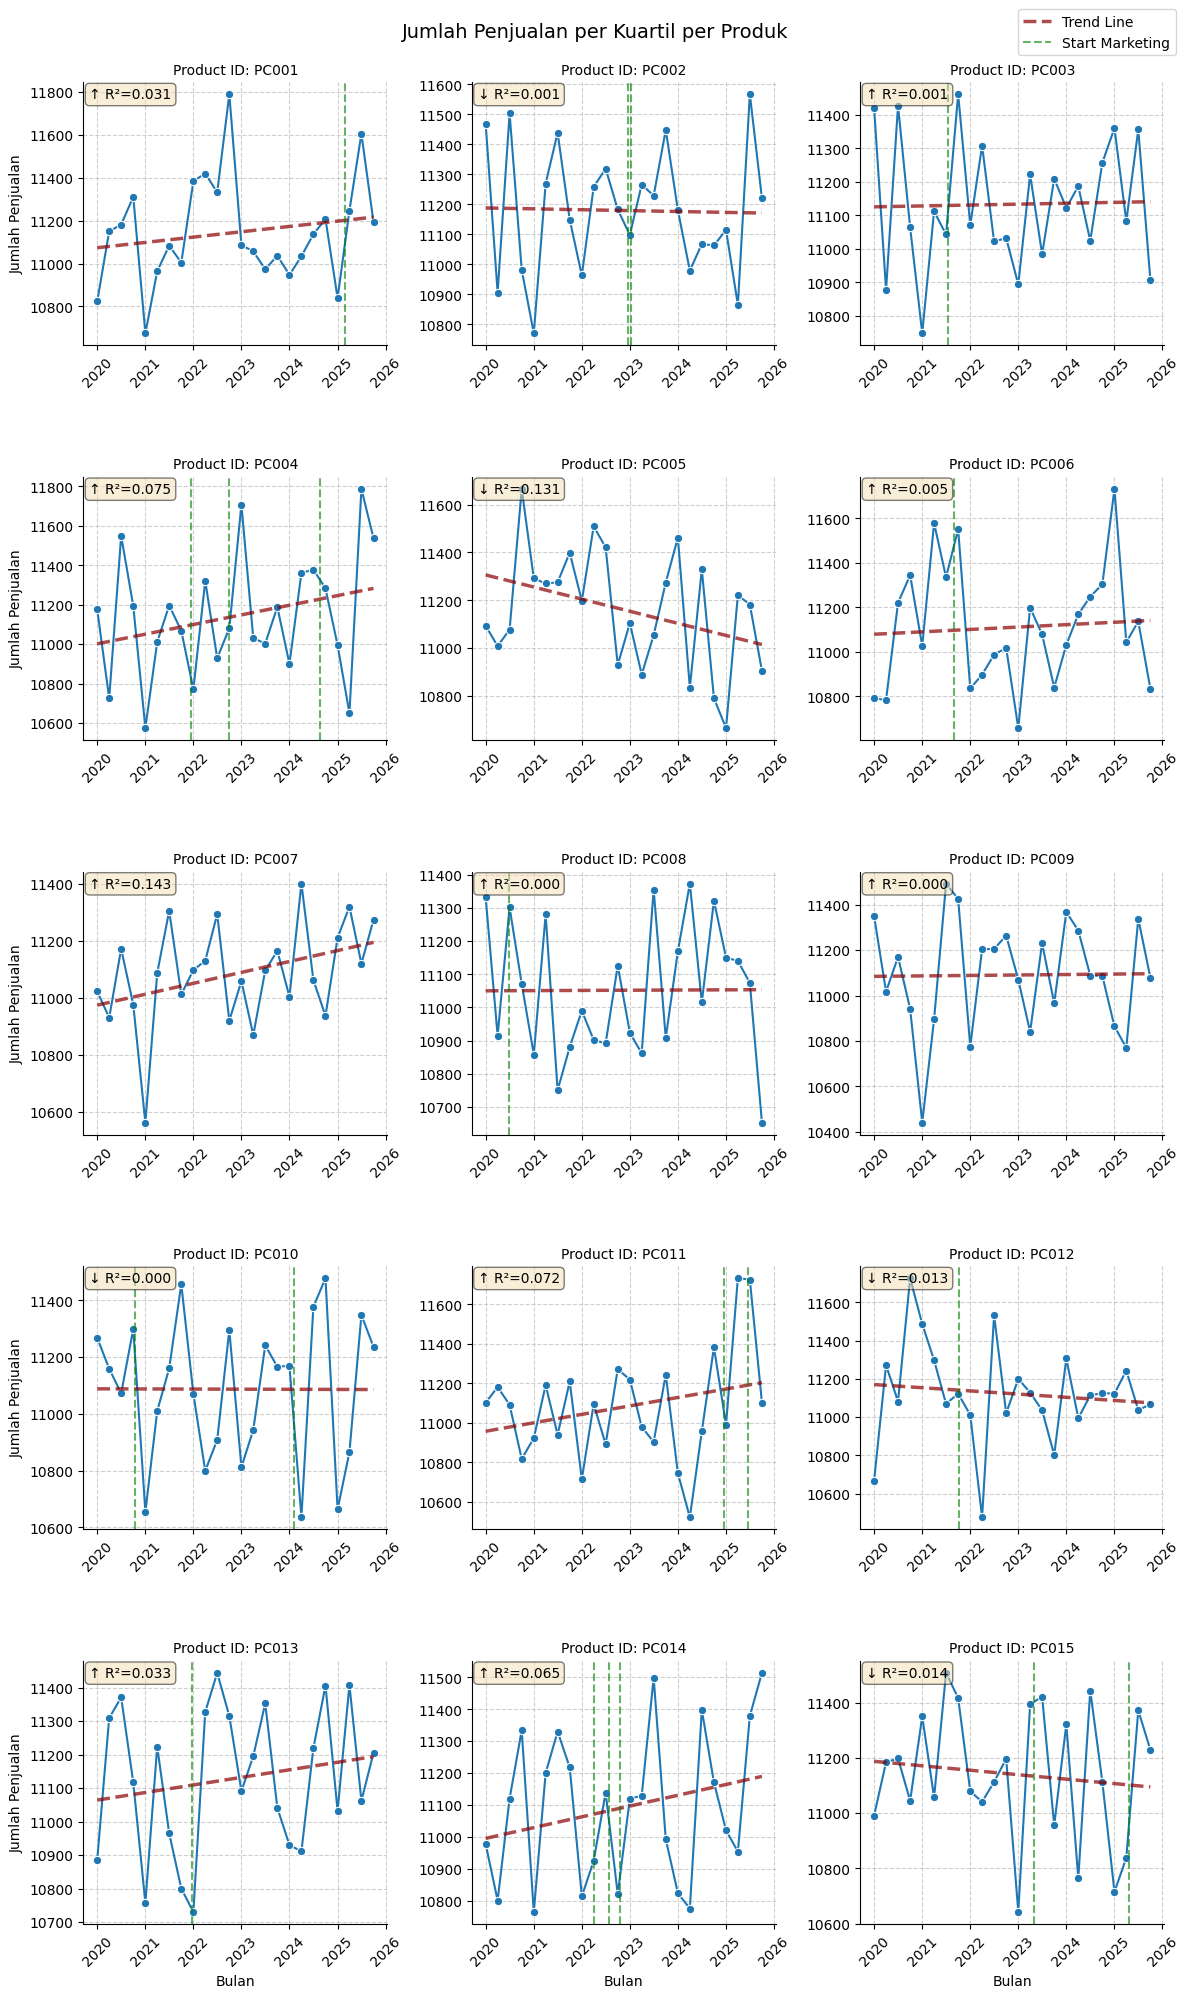

In [8]:
sales_data['date'] = pd.to_datetime(sales_data['date'])
sales_data['month'] = sales_data['date'].dt.to_period('Q')

sales_sum = sales_data.groupby(['product_id','month'])['units_sold'].sum().reset_index()
sales_sum['month'] = sales_sum['month'].dt.to_timestamp()

campaign_date = marketing_data.groupby(['product_id'])['start_date'].unique()

g = sns.FacetGrid(sales_sum, col='product_id', col_wrap=3, height=4, sharey=False, sharex=False)
g.map_dataframe(sns.lineplot, x='month', y='units_sold', marker='o')

g.set_titles(col_template="Product ID: {col_name}")
g.set_axis_labels("Bulan", "Jumlah Penjualan")

for ax, product in zip(g.axes.flatten(), g.col_names):
    product_data = sales_sum[sales_sum['product_id'] == product].sort_values('month')
    
    if len(product_data) > 0:
        x_dates = product_data['month'].values
        x_numeric = np.arange(len(x_dates))
        y = product_data['units_sold'].values
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_numeric, y)
        line = slope * x_numeric + intercept

        ax.plot(x_dates, line, '--', linewidth=2.5, color='darkred', alpha=0.7, label='Trend Line')
        
        trend_direction = "↑" if slope > 0 else "↓" if slope < 0 else "→"
        ax.text(0.02, 0.98, f'{trend_direction} R²={r_value**2:.3f}', 
                transform=ax.transAxes, fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    if product in campaign_date.index:
        dates = pd.to_datetime(campaign_date.loc[product])
        for tanggal in dates:
            ax.axvline(tanggal, color='green', linestyle='--', linewidth=1.5, alpha=0.6, label='Start Marketing')
    
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', rotation=45)

plt.subplots_adjust(top=0.95, hspace=0.5)
g.fig.suptitle("Jumlah Penjualan per Kuartil per Produk", fontsize=14)

handles, labels = g.axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
g.fig.legend(by_label.values(), by_label.keys(), loc='upper right', bbox_to_anchor=(0.99, 0.99))

plt.show()

Kode berikut digunakan untuk menampilkan **grafik batang yang menggambarkan persentase perubahan penjualan setiap produk** dari periode awal hingga periode akhir penjualan.

Berdasarkan grafik tersebut, **produk PC014 menunjukkan peningkatan penjualan tertinggi**, dengan kenaikan lebih dari **4%** dibandingkan periode awal. Sebaliknya, **produk PC008 mengalami penurunan paling signifikan**, dengan penurunan lebih dari **6%** dari nilai awal penjualannya.


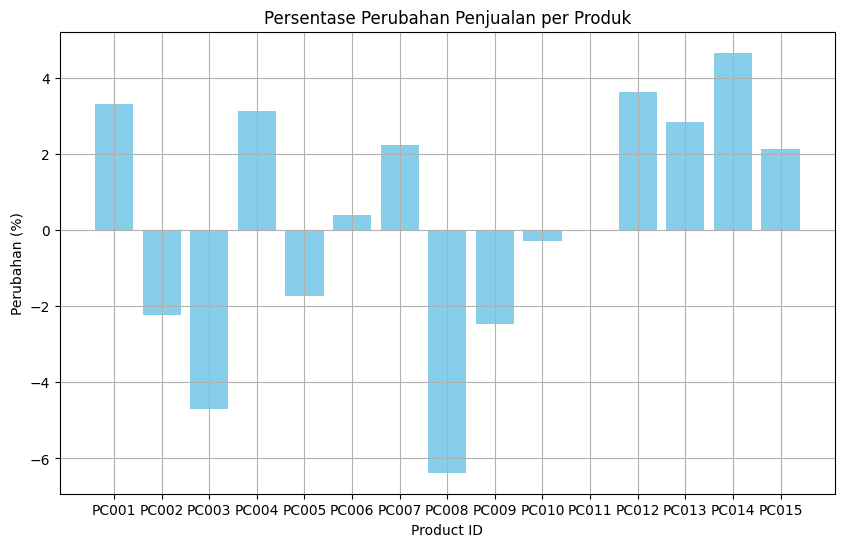

In [9]:
from datetime import datetime

product_sold_percentage = []

sold_percentage = sales_sum[
    (sales_sum['month'] == datetime(2020, 1, 1)) |
    (sales_sum['month'] == datetime(2025, 10, 1))
].reset_index(drop=True)

product_id = np.unique(sold_percentage['product_id'])

for i in range(1 , len(sold_percentage), 2):
    tmp = ((sold_percentage['units_sold'].iloc[i] - sold_percentage['units_sold'].iloc[i-1]) / sold_percentage['units_sold'].iloc[i]) * 100
    product_sold_percentage.append(tmp)

plt.figure(figsize=(10, 6))
plt.bar(product_id, product_sold_percentage, color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Perubahan (%)")
plt.title("Persentase Perubahan Penjualan per Produk")
plt.show()

Kode berikut digunakan untuk menampilkan **grafik kontribusi revenue dari setiap produk** sepanjang periode penjualan.

Dari hasil visualisasi tersebut, terlihat bahwa **tiga produk dengan kontribusi revenue tertinggi** adalah **PC010**, **PC007**, dan **PC014**, yang menunjukkan dominasi ketiganya dalam total pendapatan perusahaan.

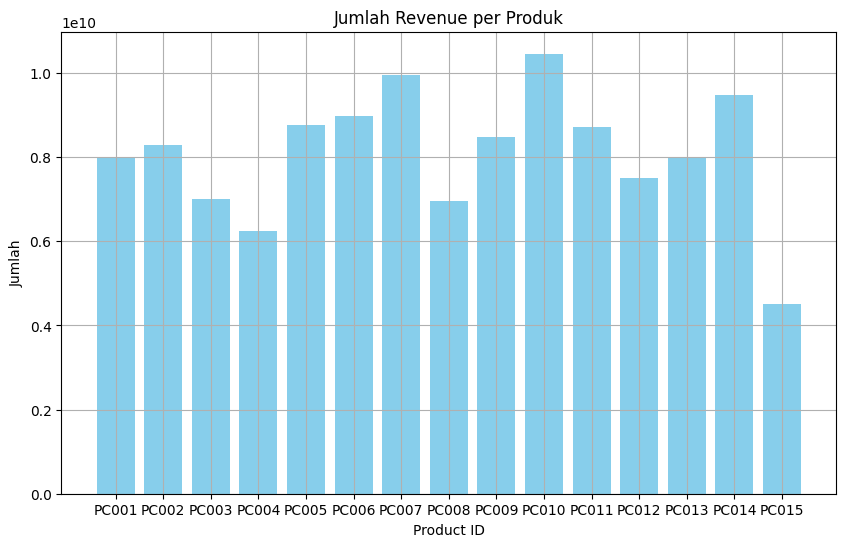

In [10]:
revenue_sum = sales_data.groupby(['product_id'])['revenue'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(product_id, revenue_sum['revenue'], color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Jumlah")
plt.title("Jumlah Revenue per Produk")
plt.show()

Kode di bawah ini menampilkan grafik jumlah permintaan barang dimana secara keseluruhan semua produk memiliki jumlah permintaan yang relatif sama sehingga analisis dapat difokuskan pada kecenderungan dan kestabilan tren saja.Kode berikut digunakan untuk menampilkan **grafik jumlah permintaan barang** untuk setiap produk.

Berdasarkan grafik tersebut, terlihat bahwa **seluruh produk memiliki tingkat permintaan yang relatif seimbang**. Oleh karena itu, analisis selanjutnya difokuskan pada **pola kecenderungan dan kestabilan tren penjualan**, bukan pada perbedaan volume permintaan antar produk.

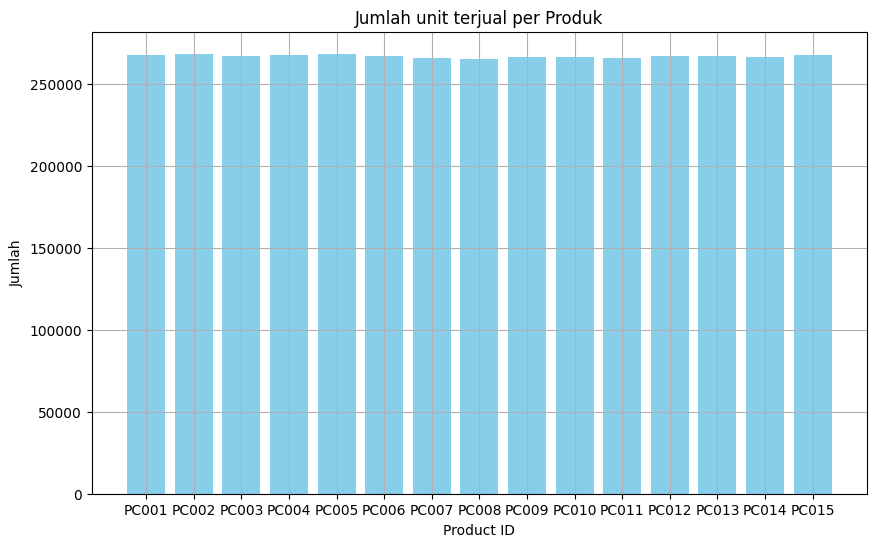

In [11]:
unit_sold_sum = sales_data.groupby(['product_id'])['units_sold'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(product_id, unit_sold_sum['units_sold'], color='skyblue')
plt.grid(True)
plt.xlabel("Product ID")
plt.ylabel("Jumlah")
plt.title("Jumlah unit terjual per Produk")
plt.show()

In [12]:
unit_sold_region = sales_data.groupby(['product_id','region','month'])['units_sold'].sum()

Untuk memberikan **gambaran yang lebih jelas mengenai sumber penjualan setiap produk**, berikut disajikan **grafik distribusi penjualan per produk di seluruh region**.

Berdasarkan grafik tersebut, terdapat beberapa produk yang menunjukkan **performa penjualan yang baik di sebagian besar region**, namun **kurang optimal di region tertentu**. Produk yang memiliki pola tersebut antara lain **PC001**, **PC004**, **PC007**, **PC011**, **PC013**, dan **PC014**.

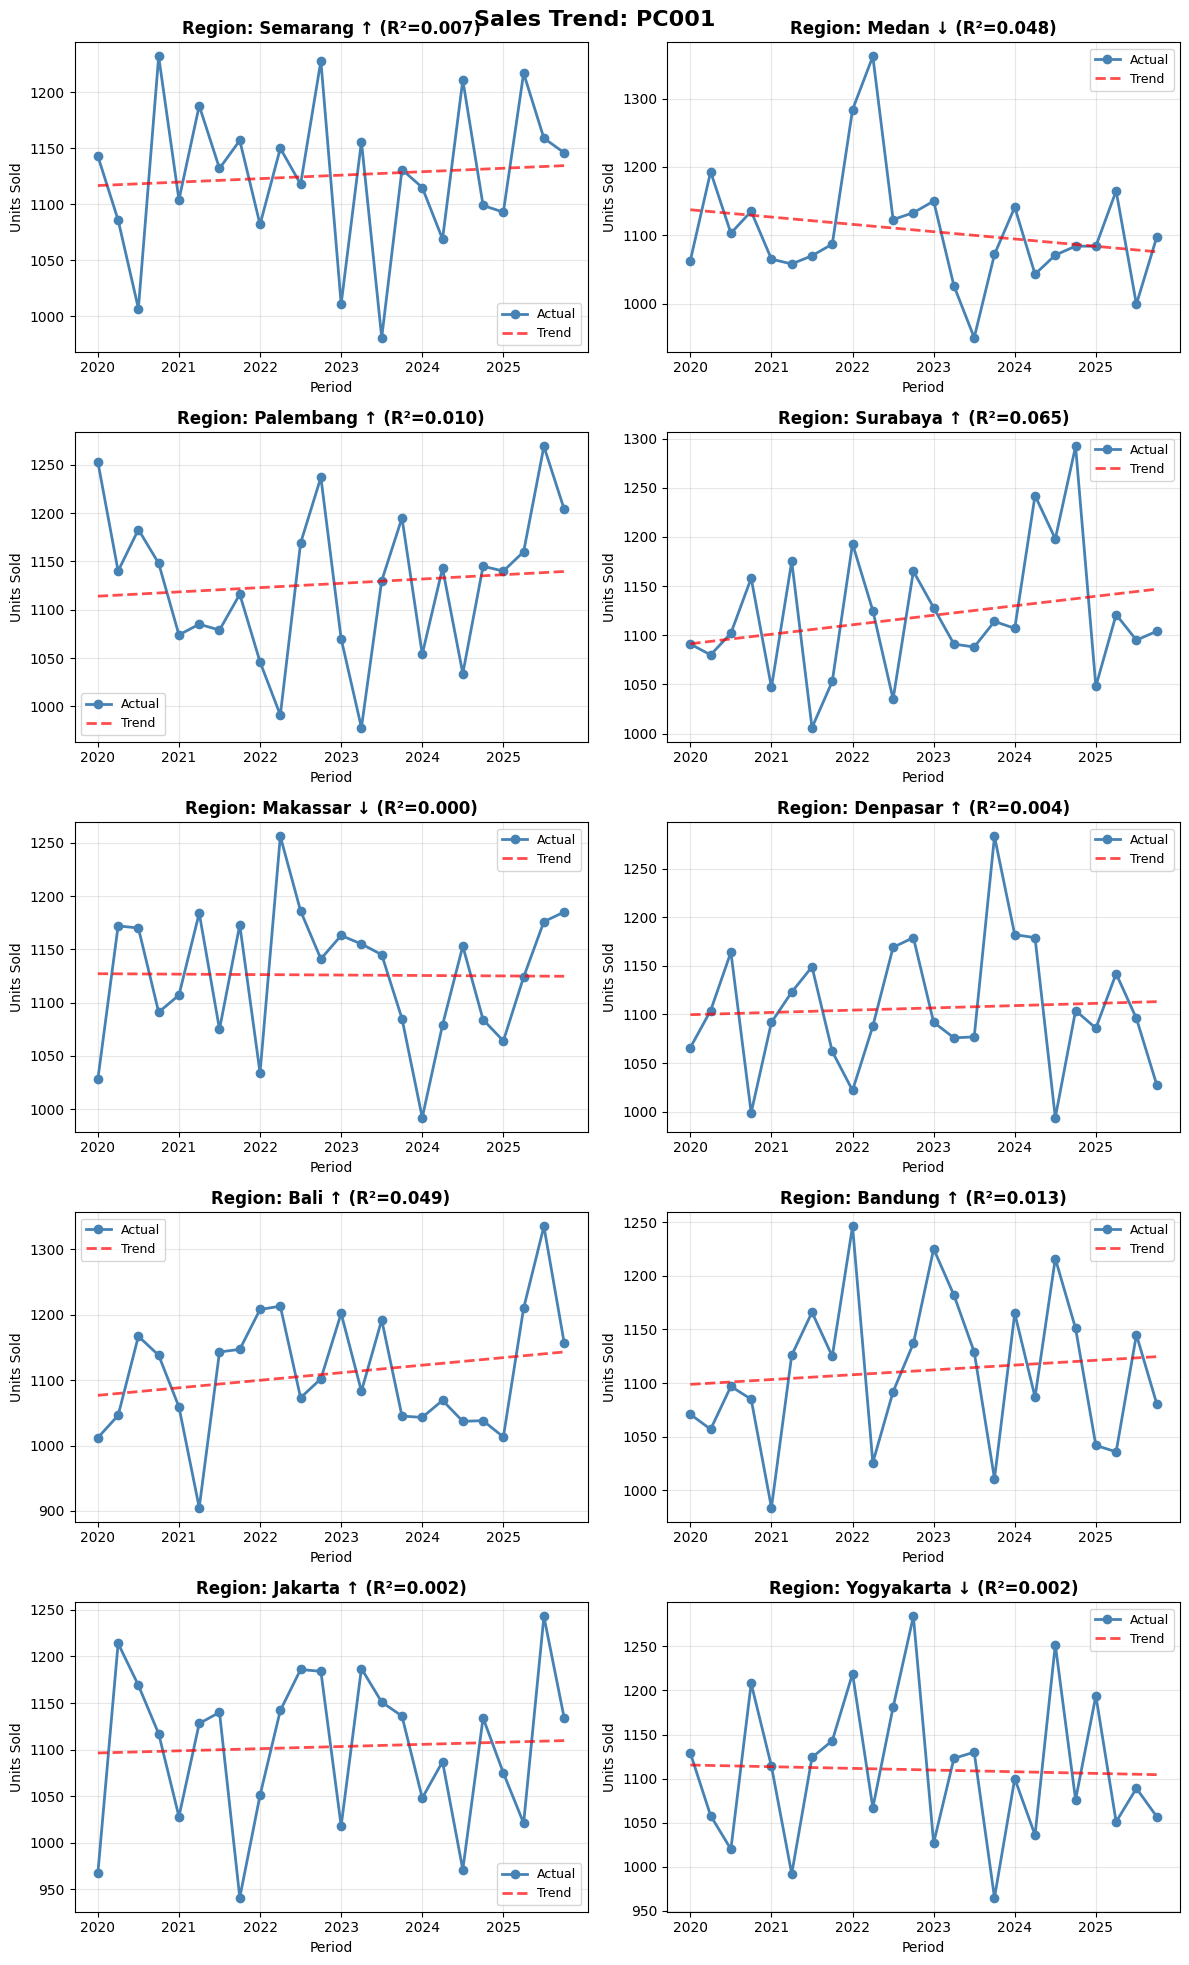

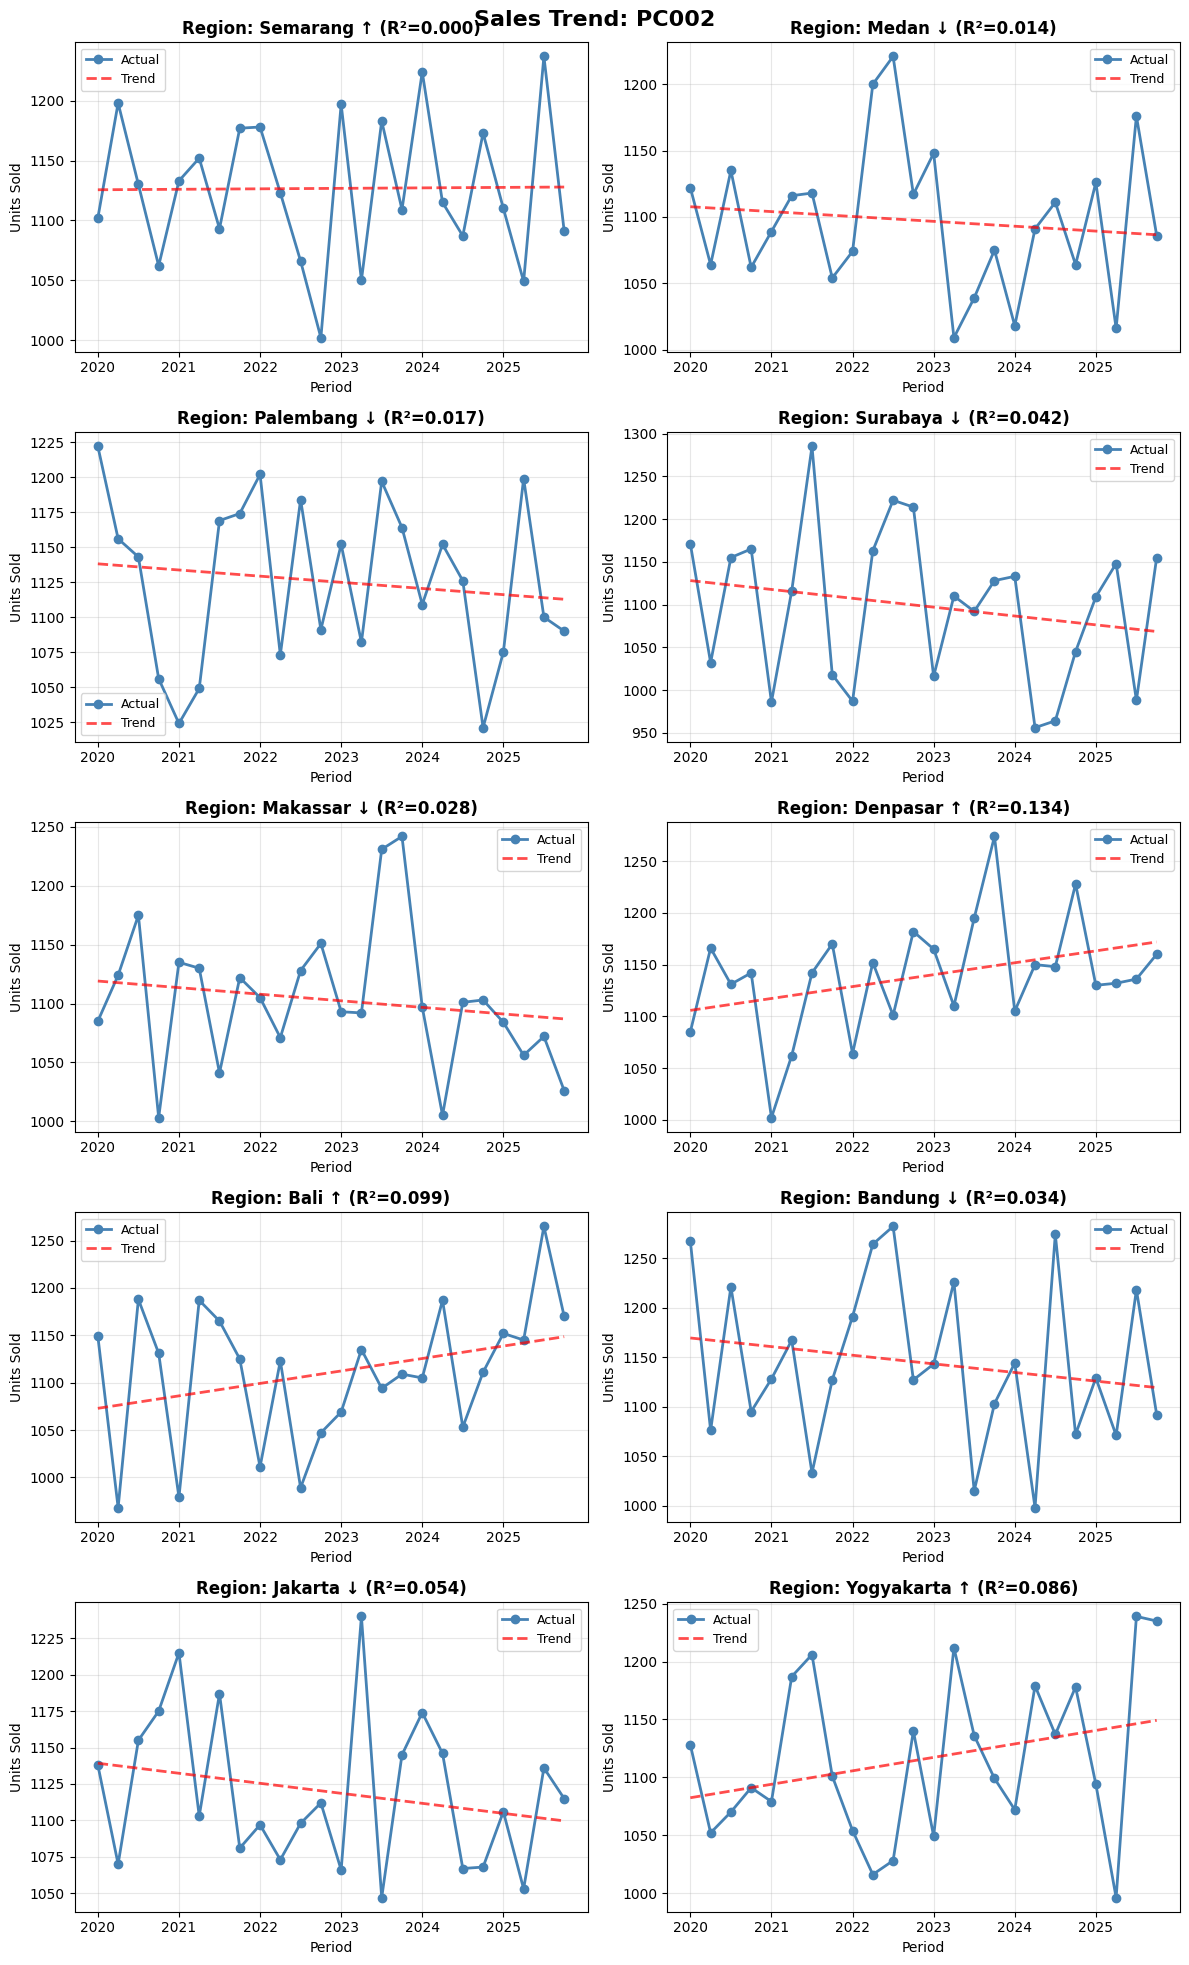

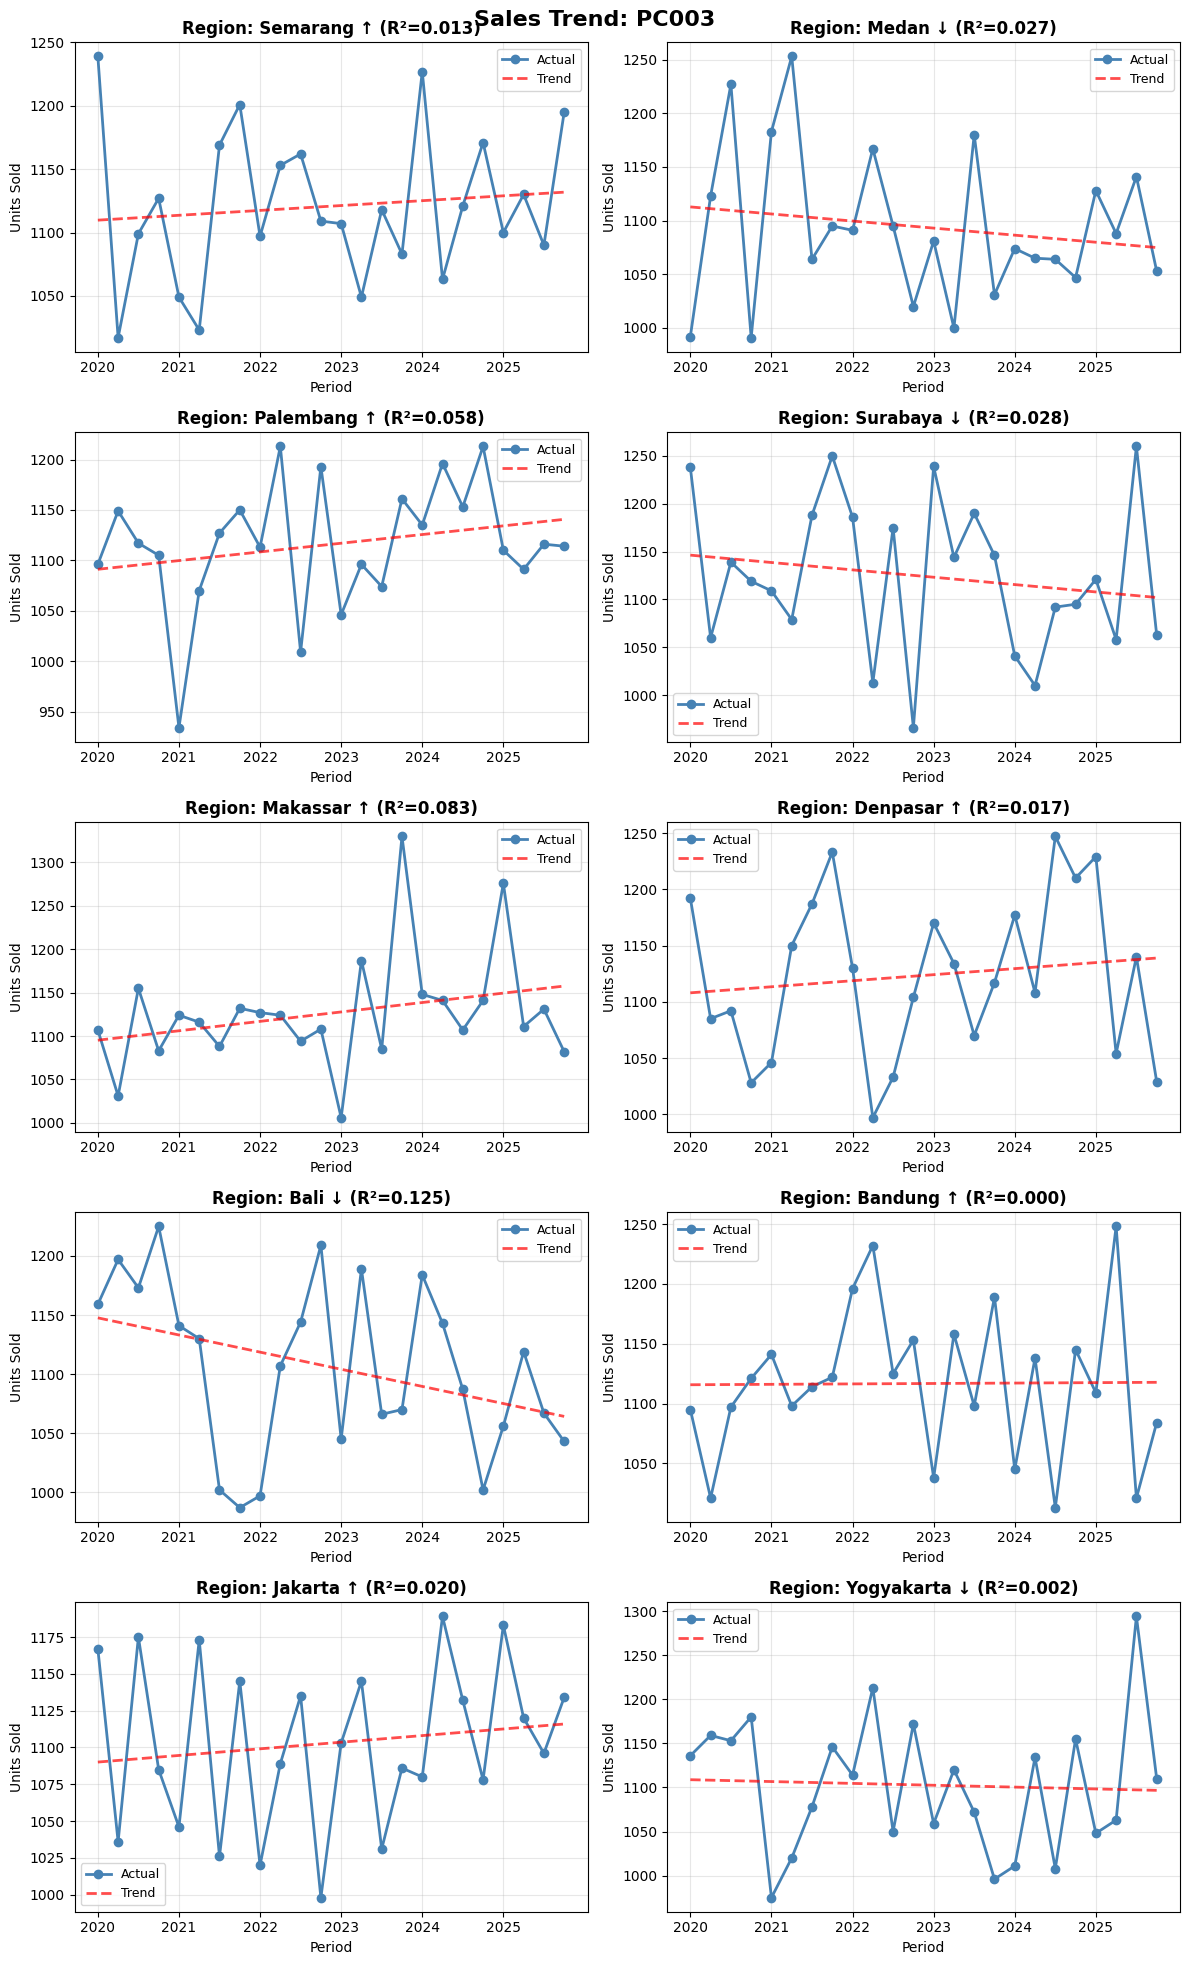

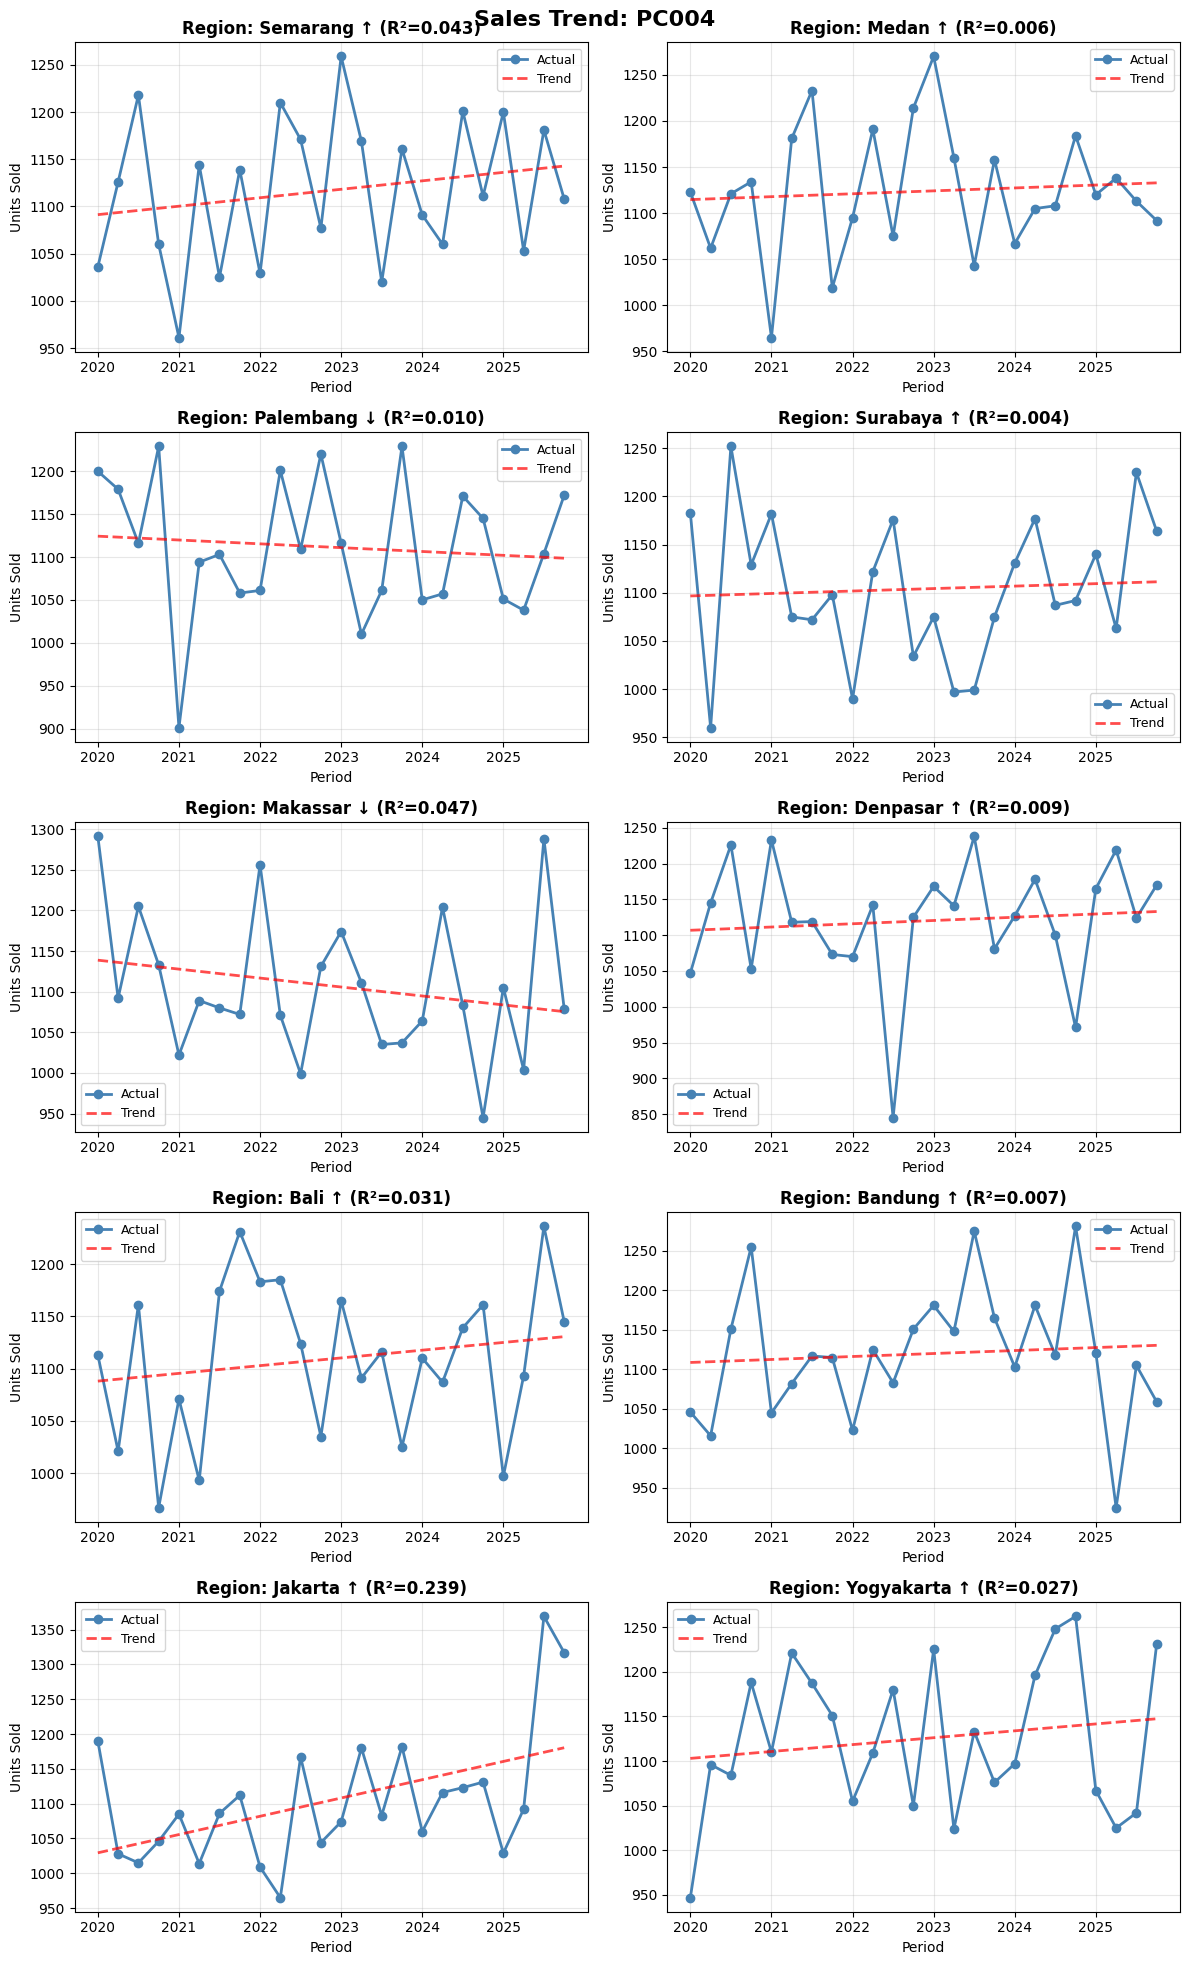

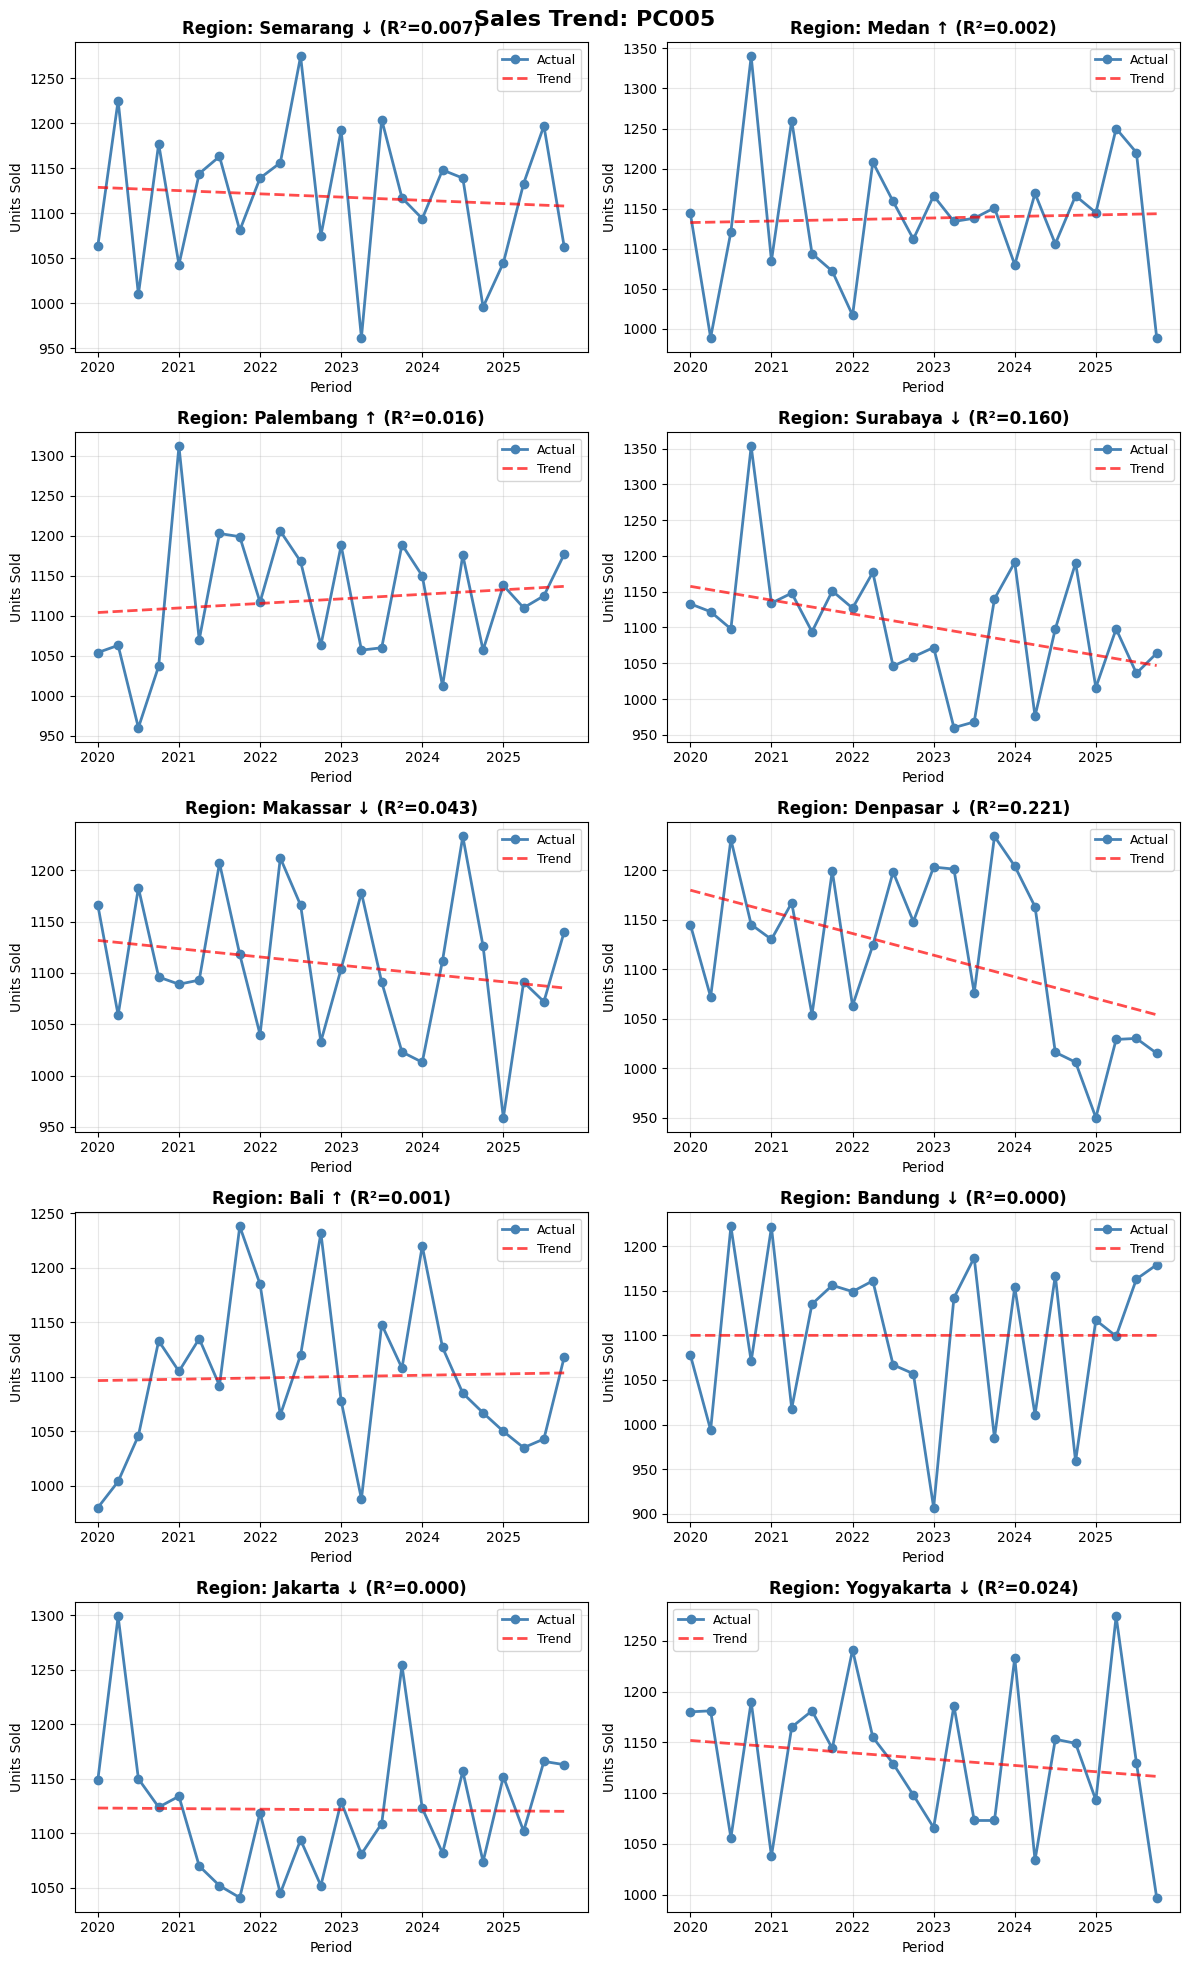

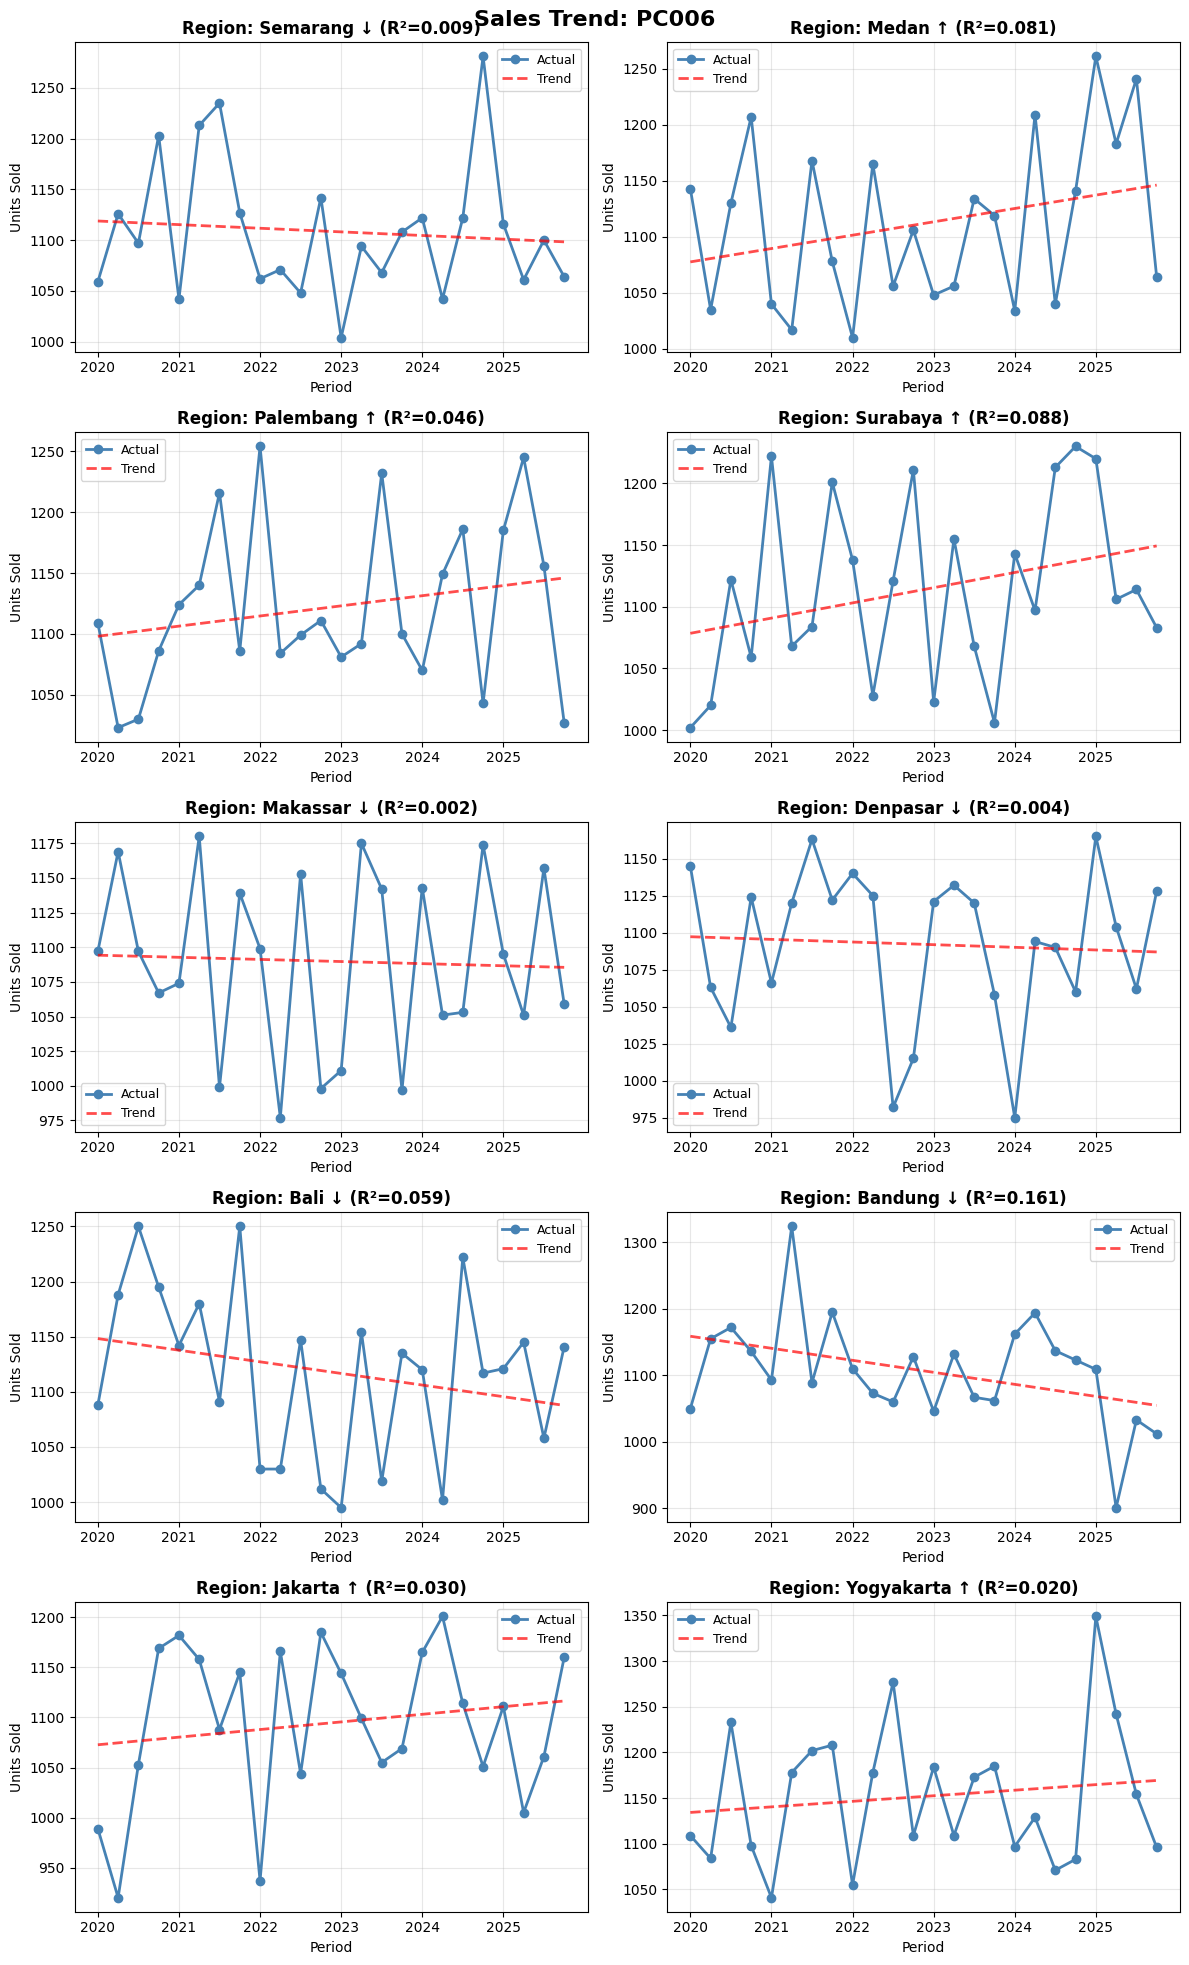

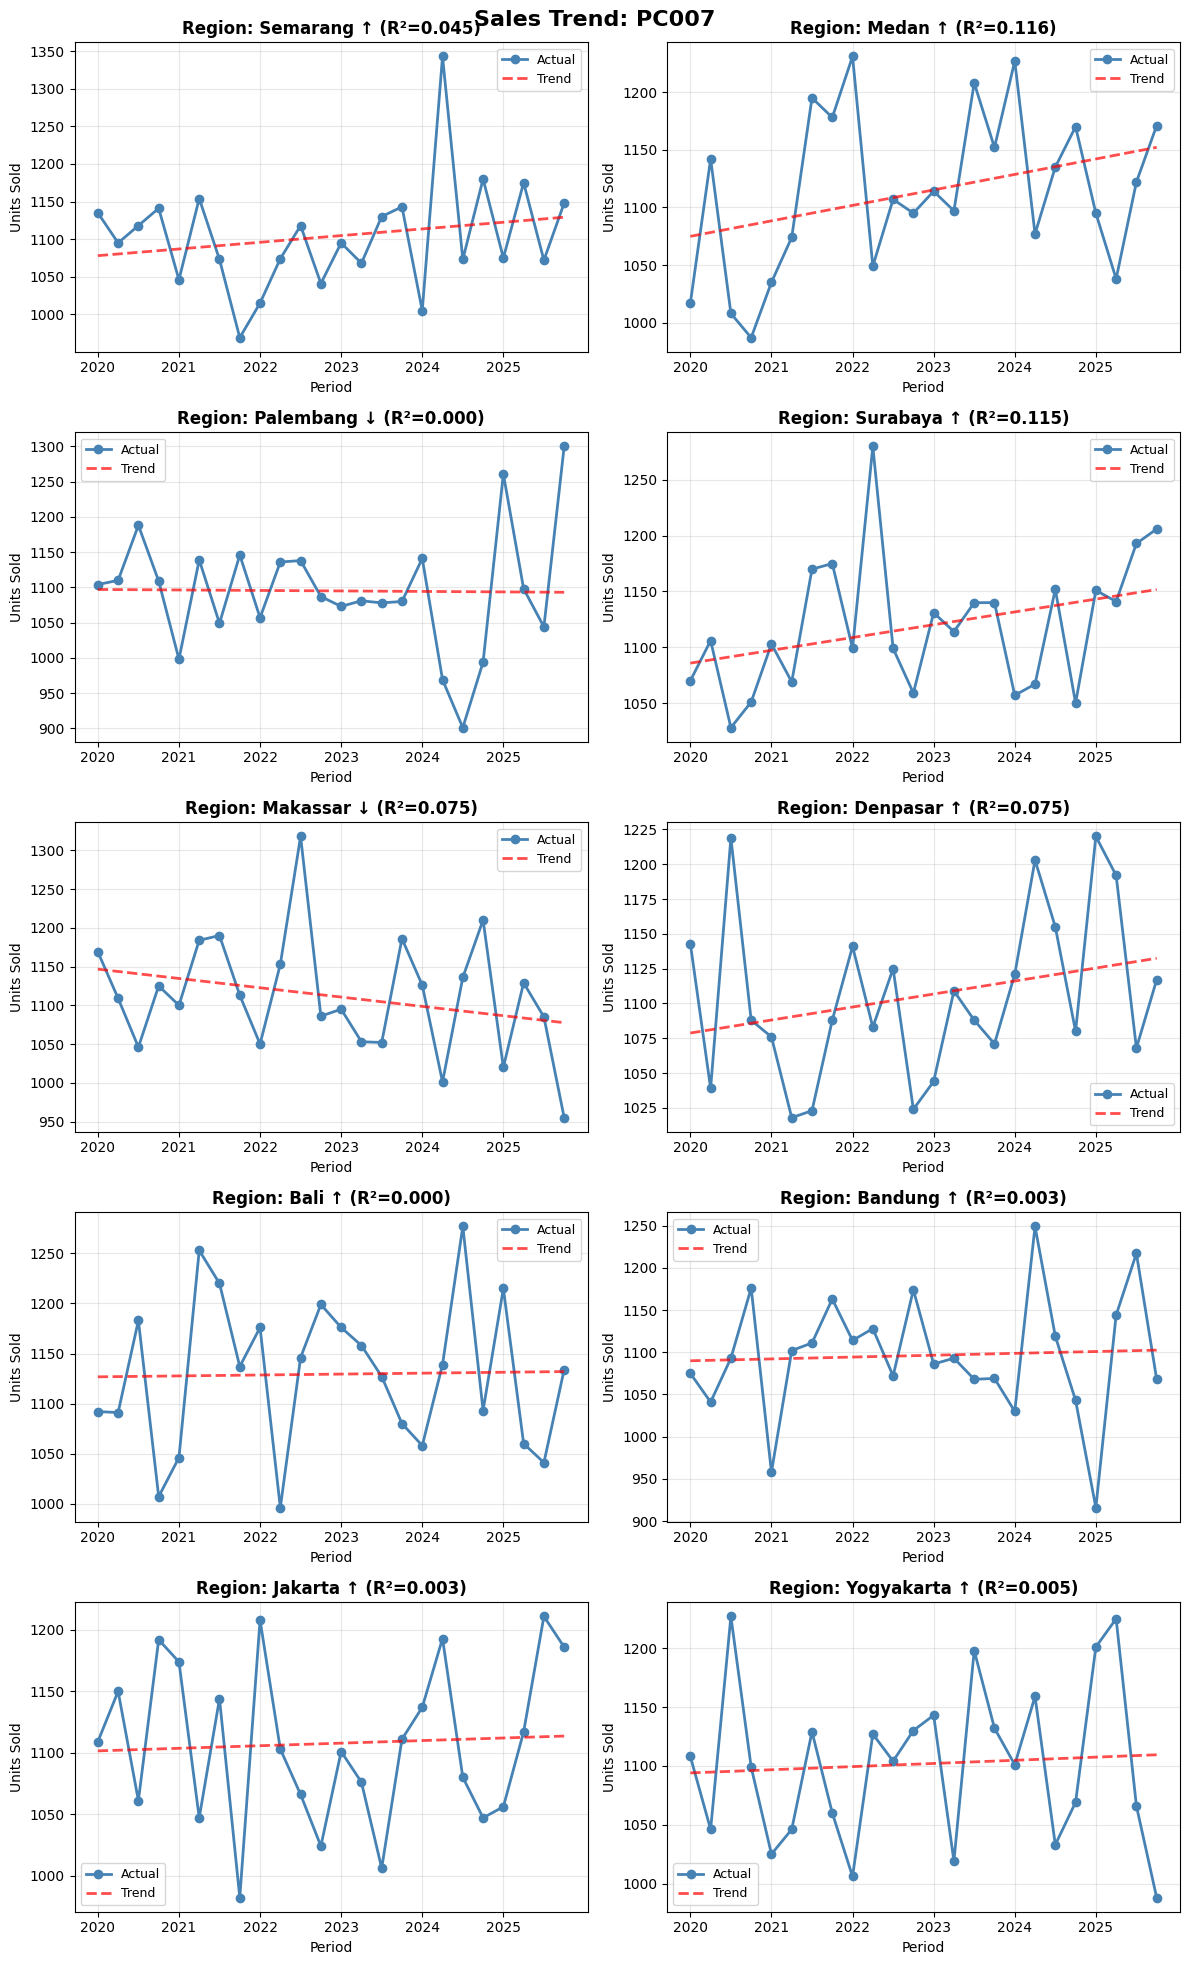

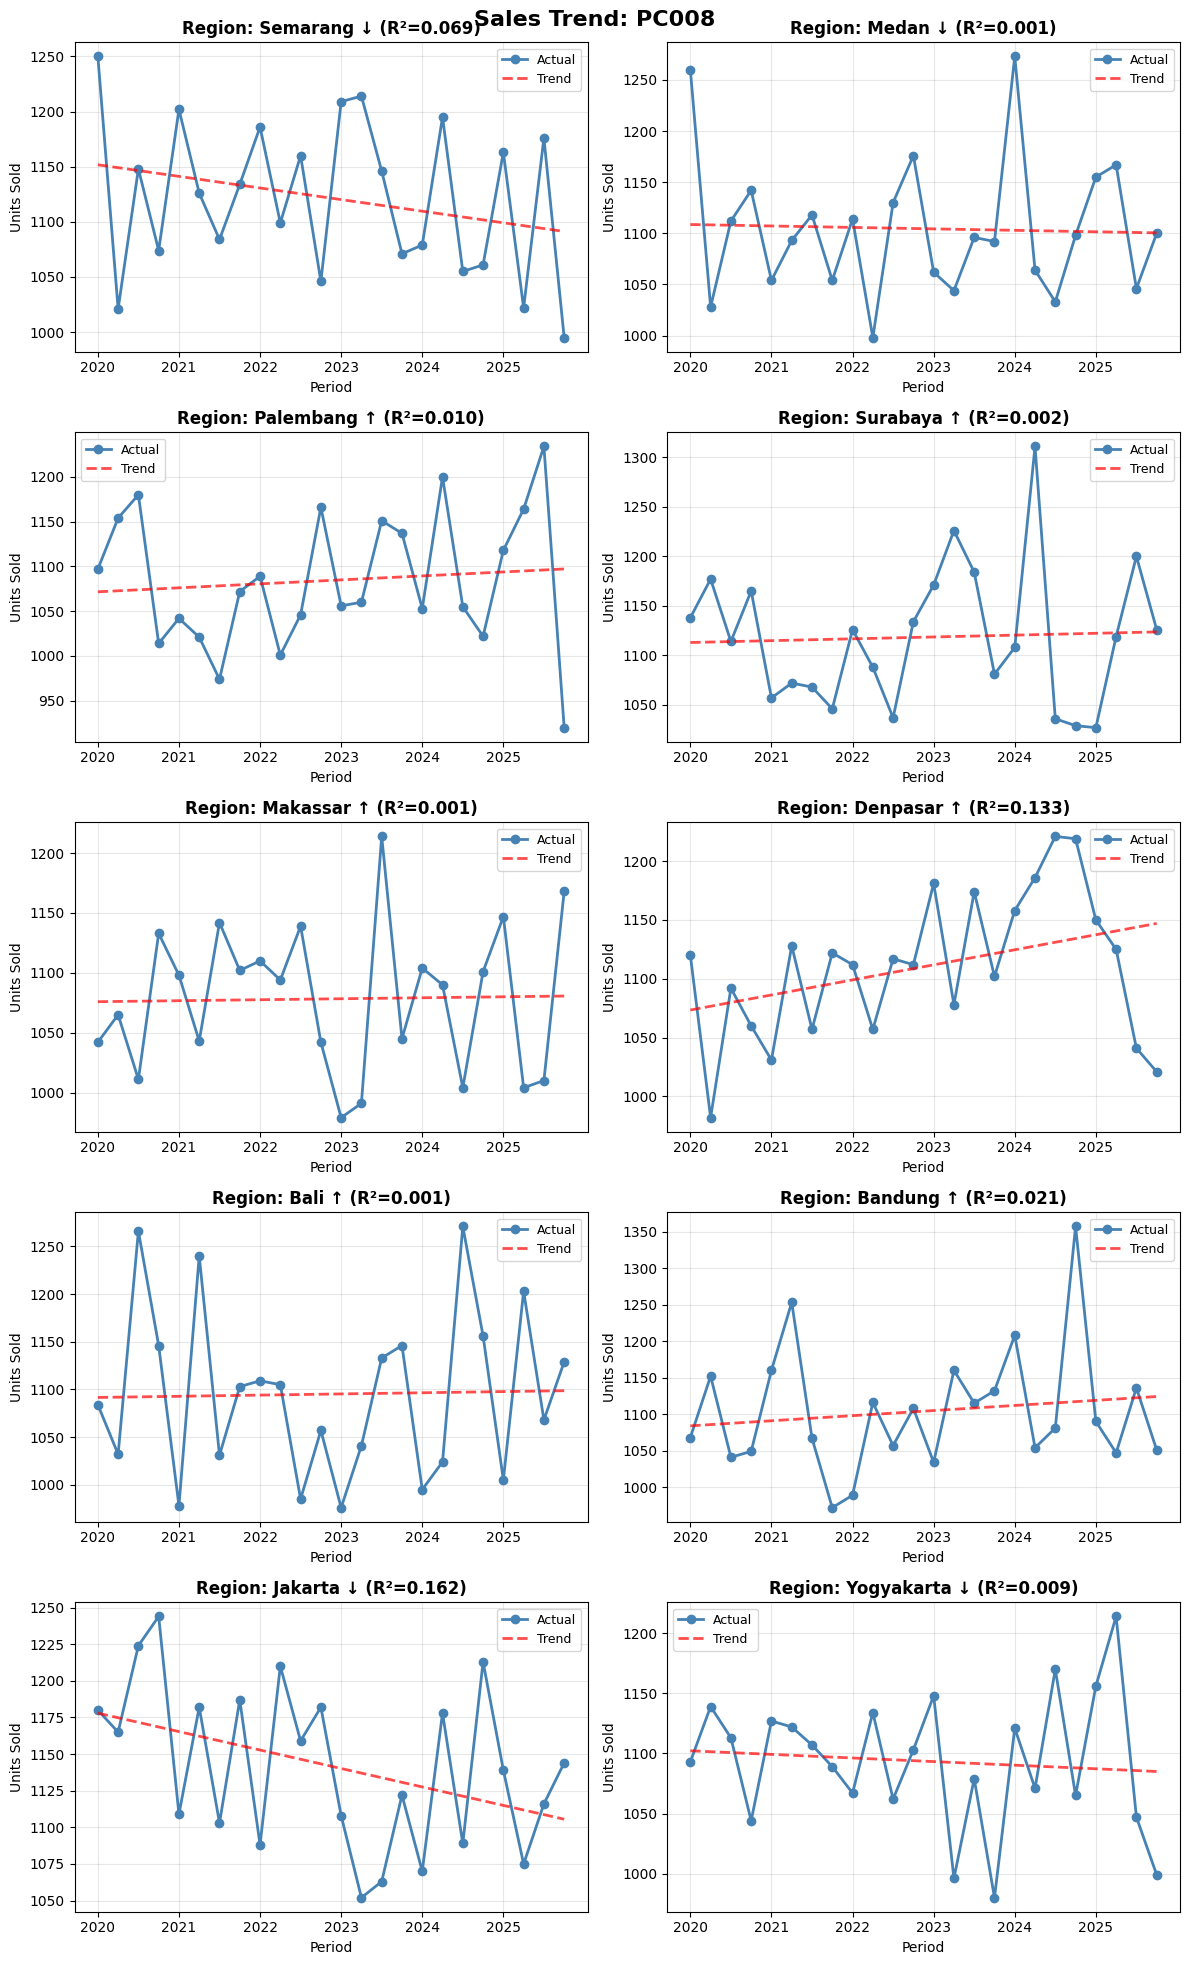

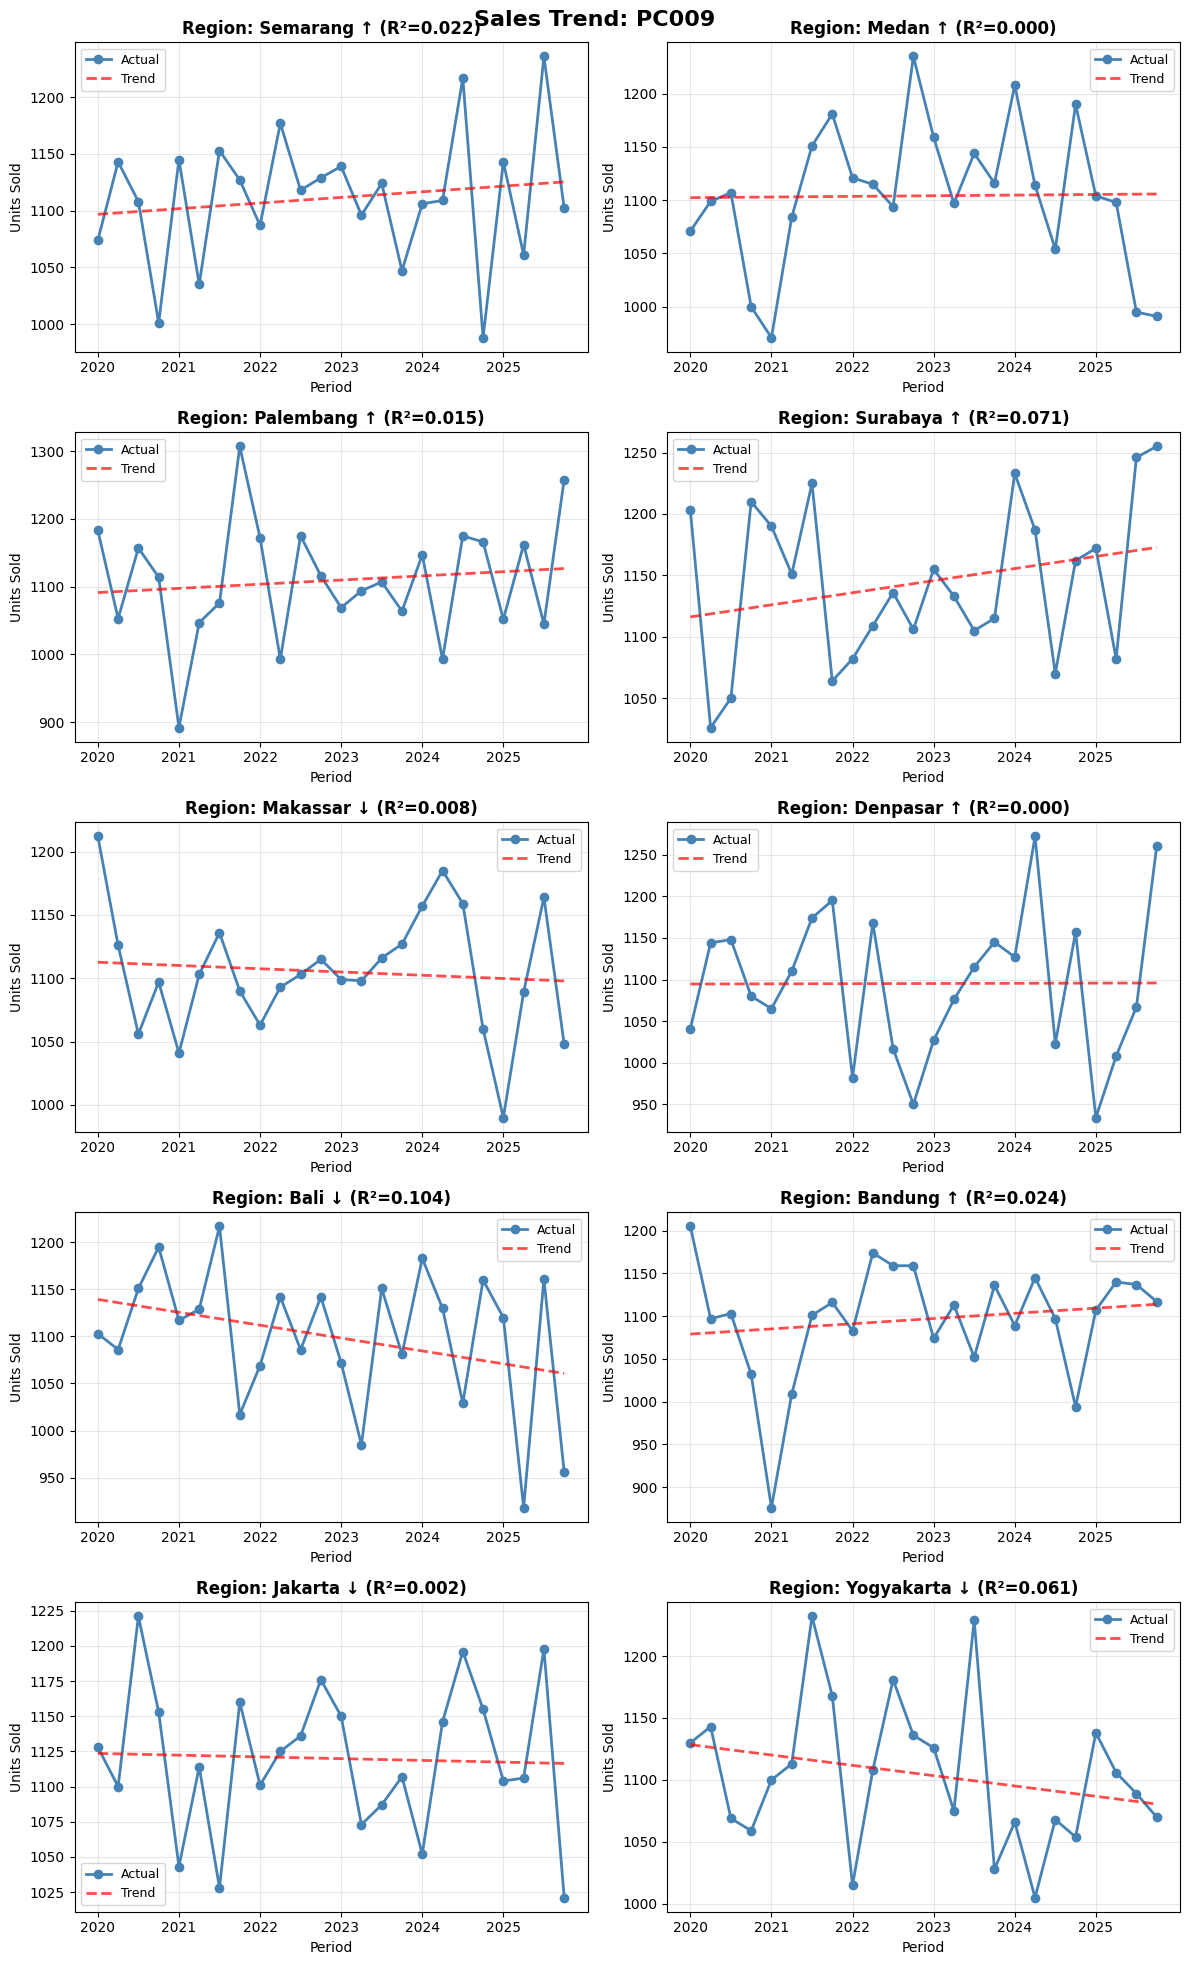

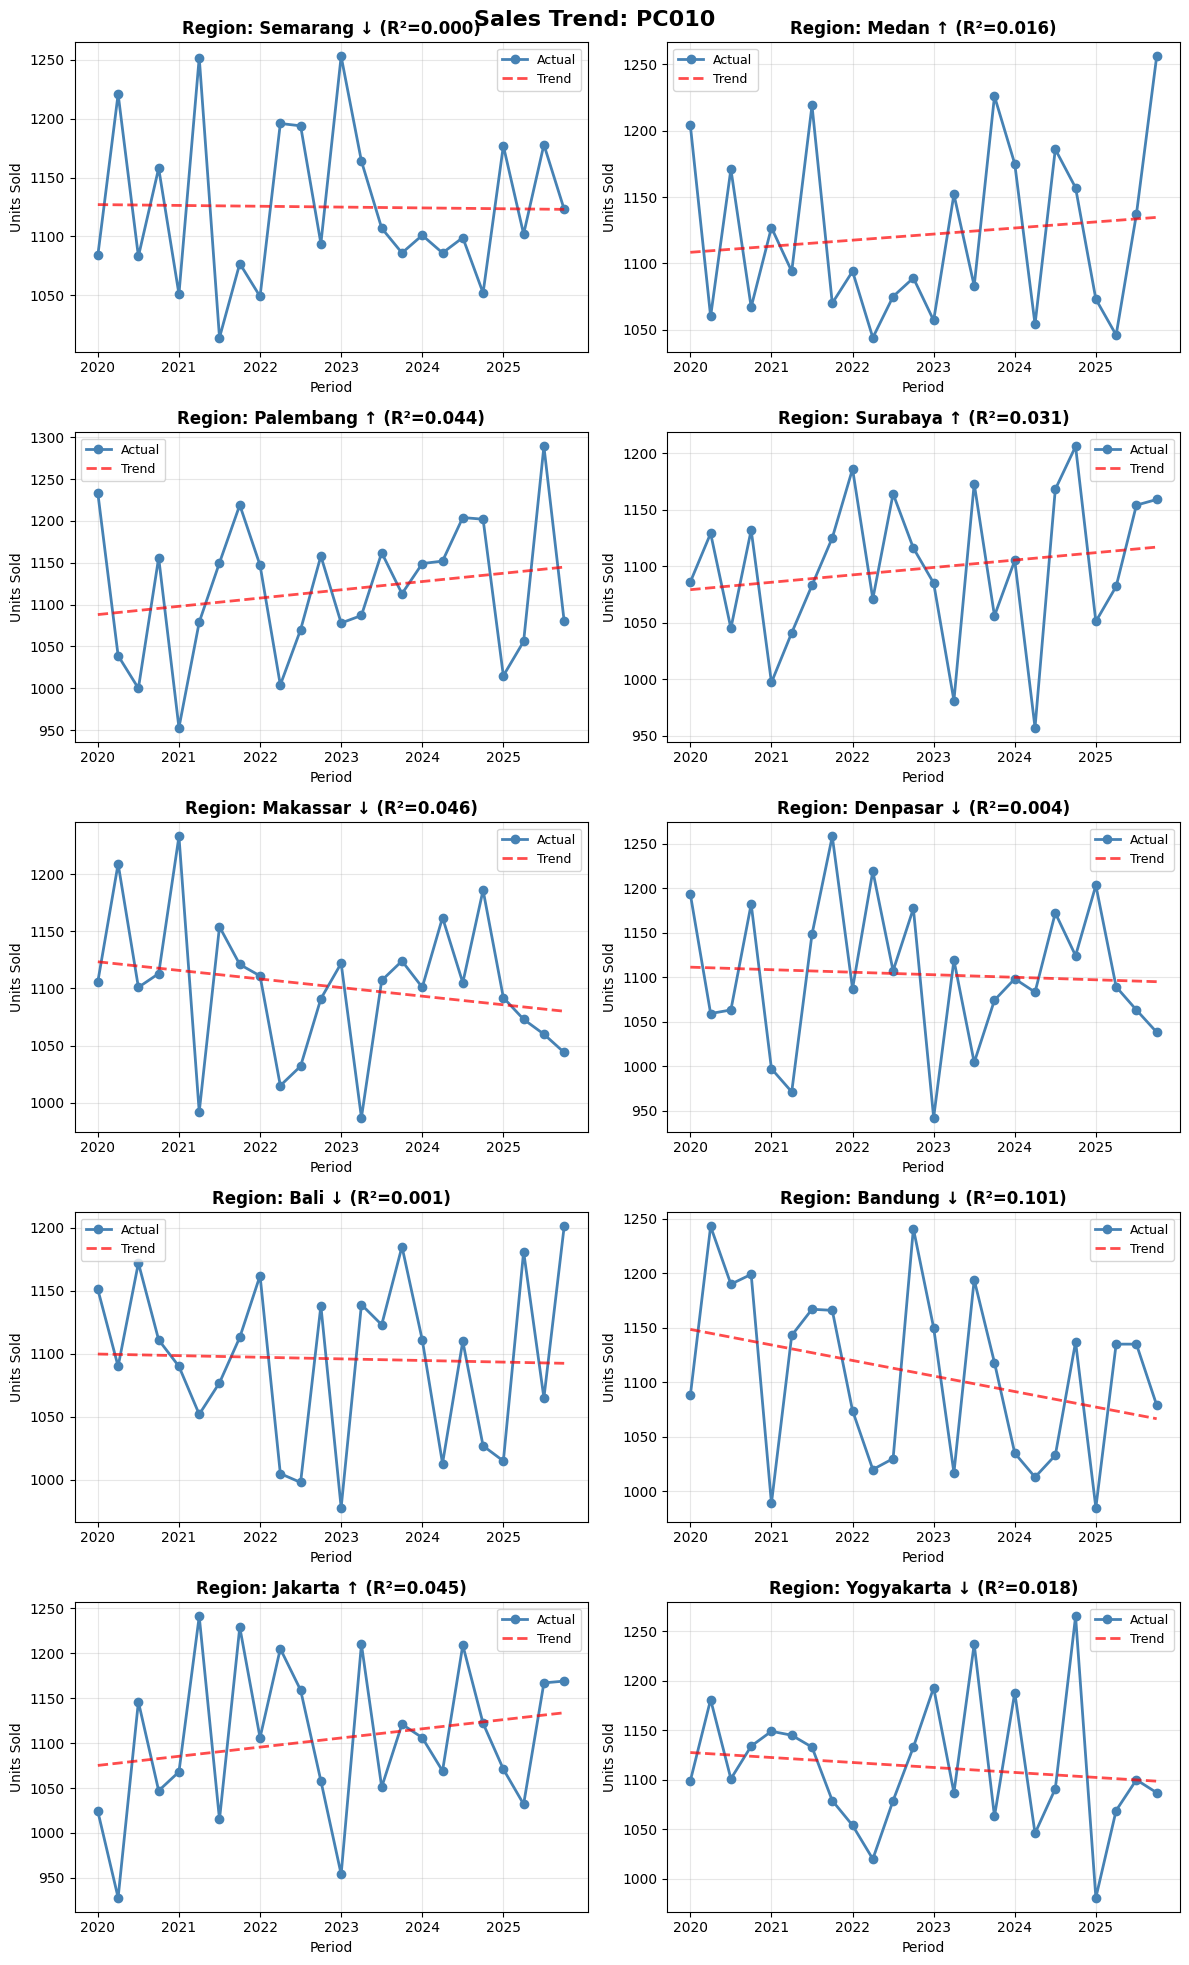

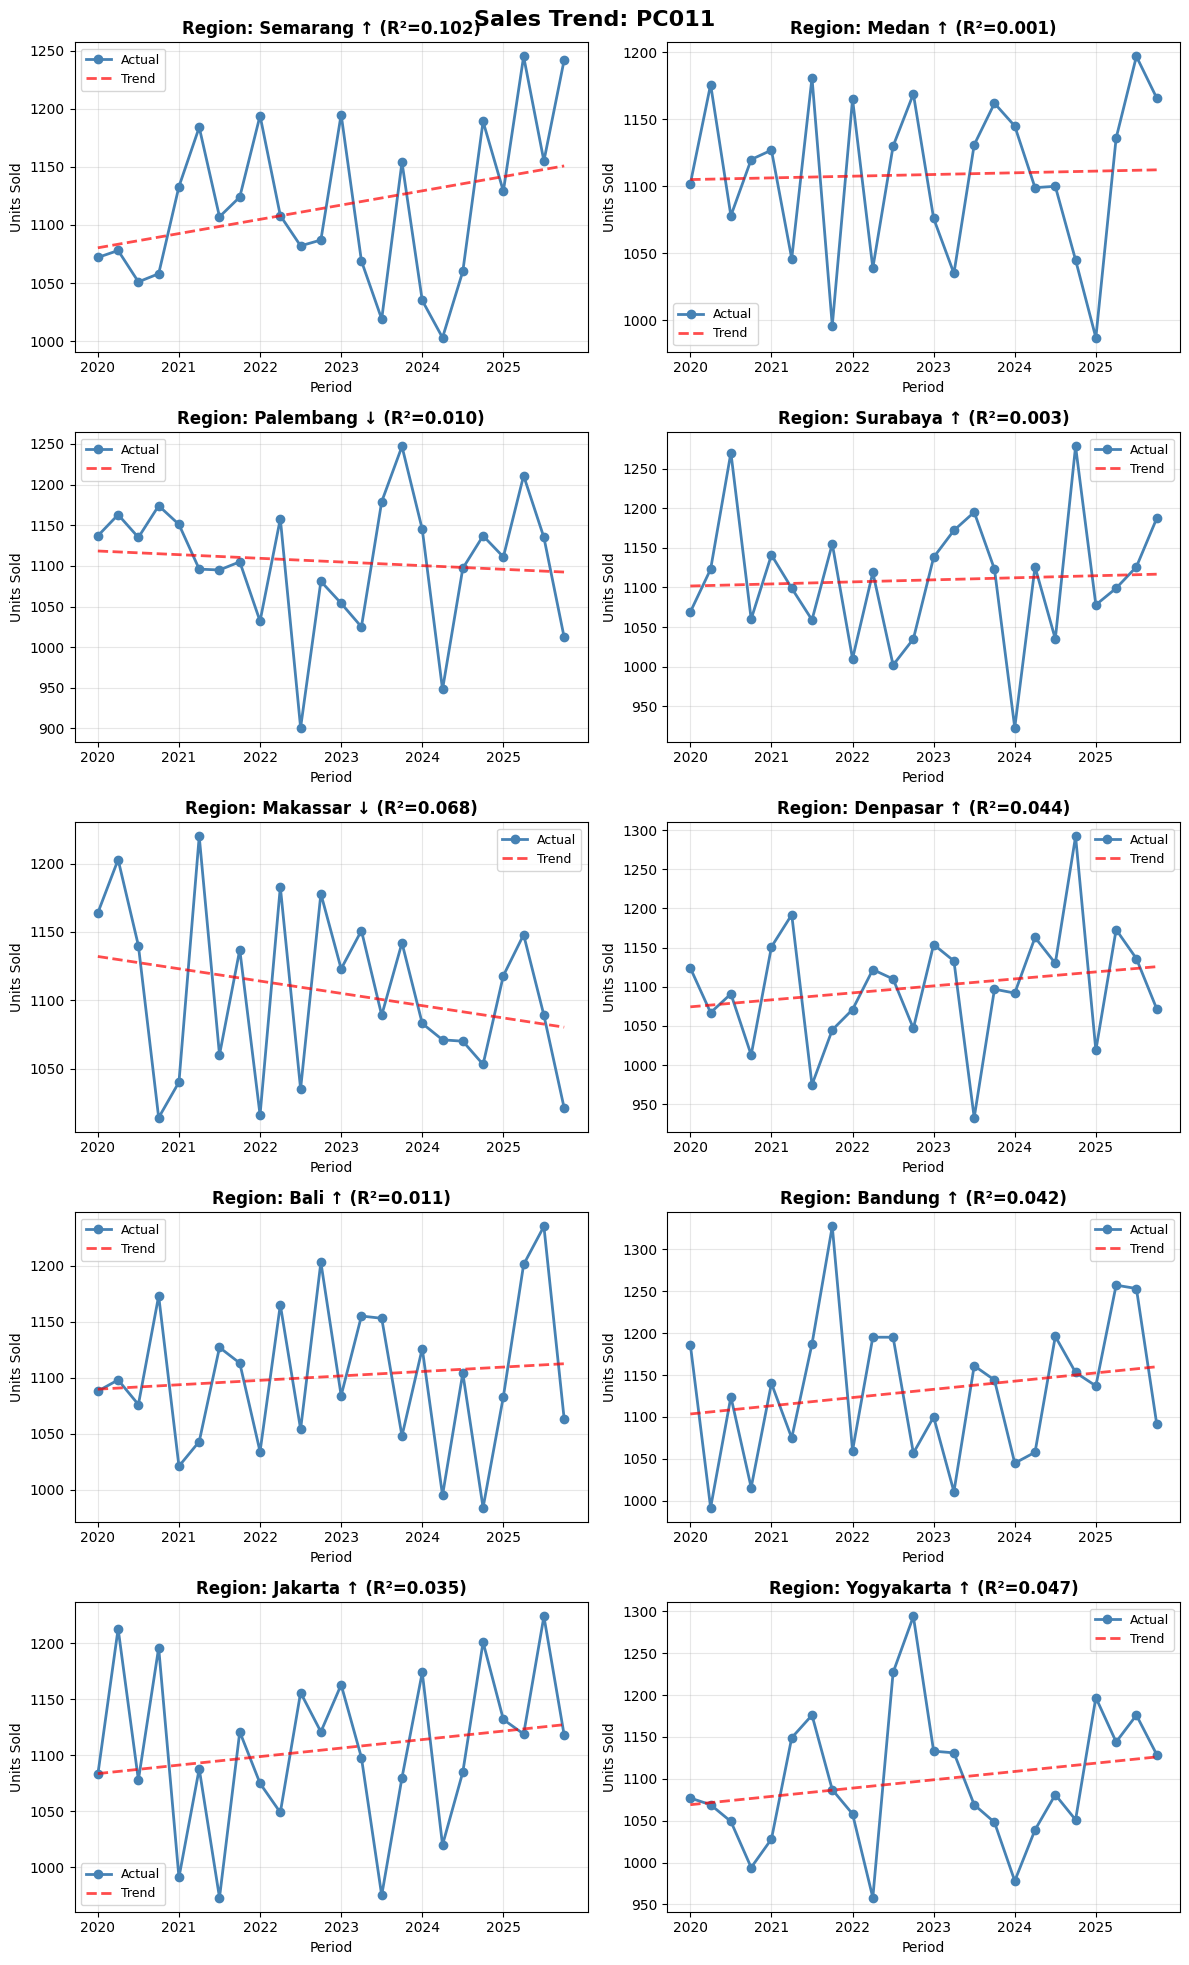

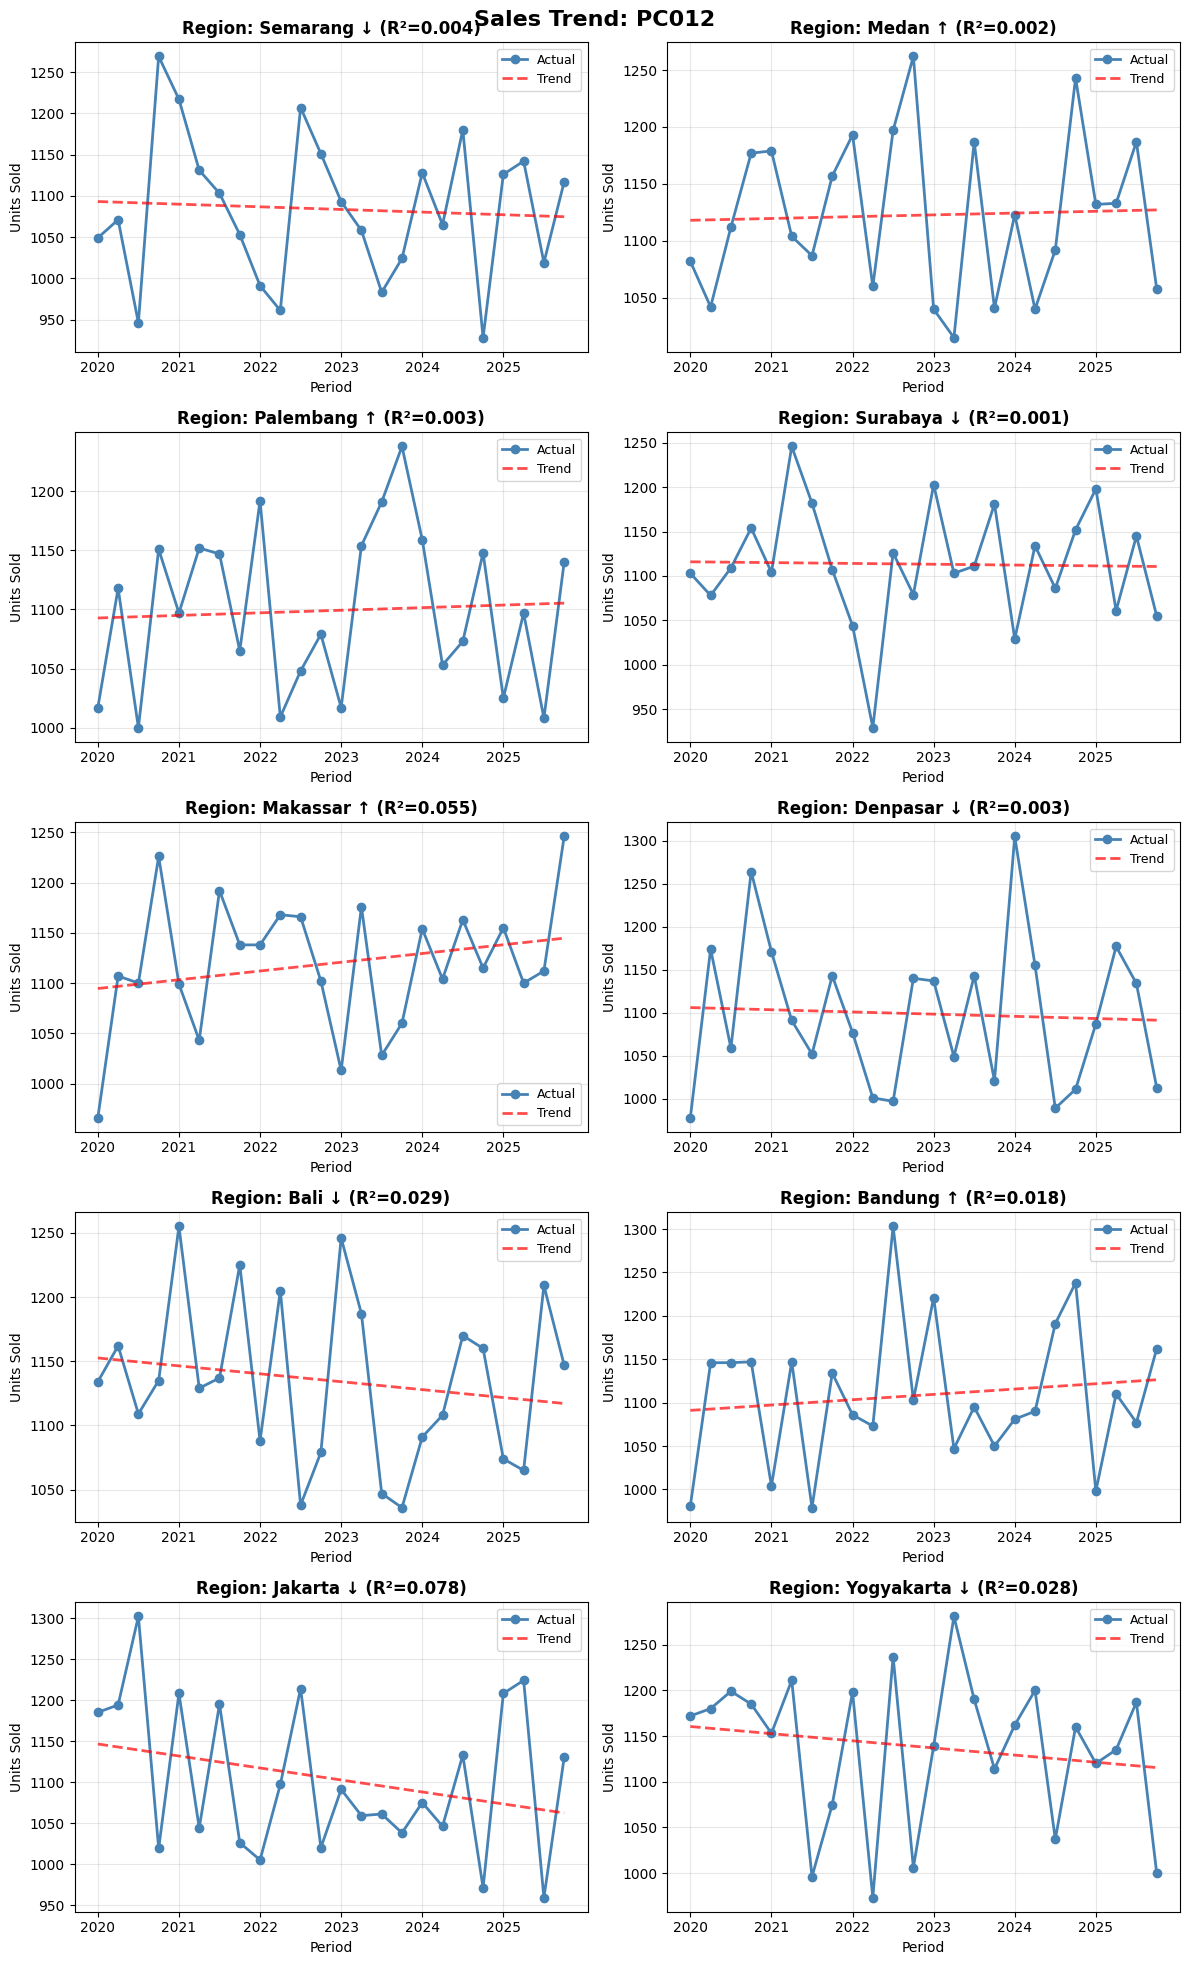

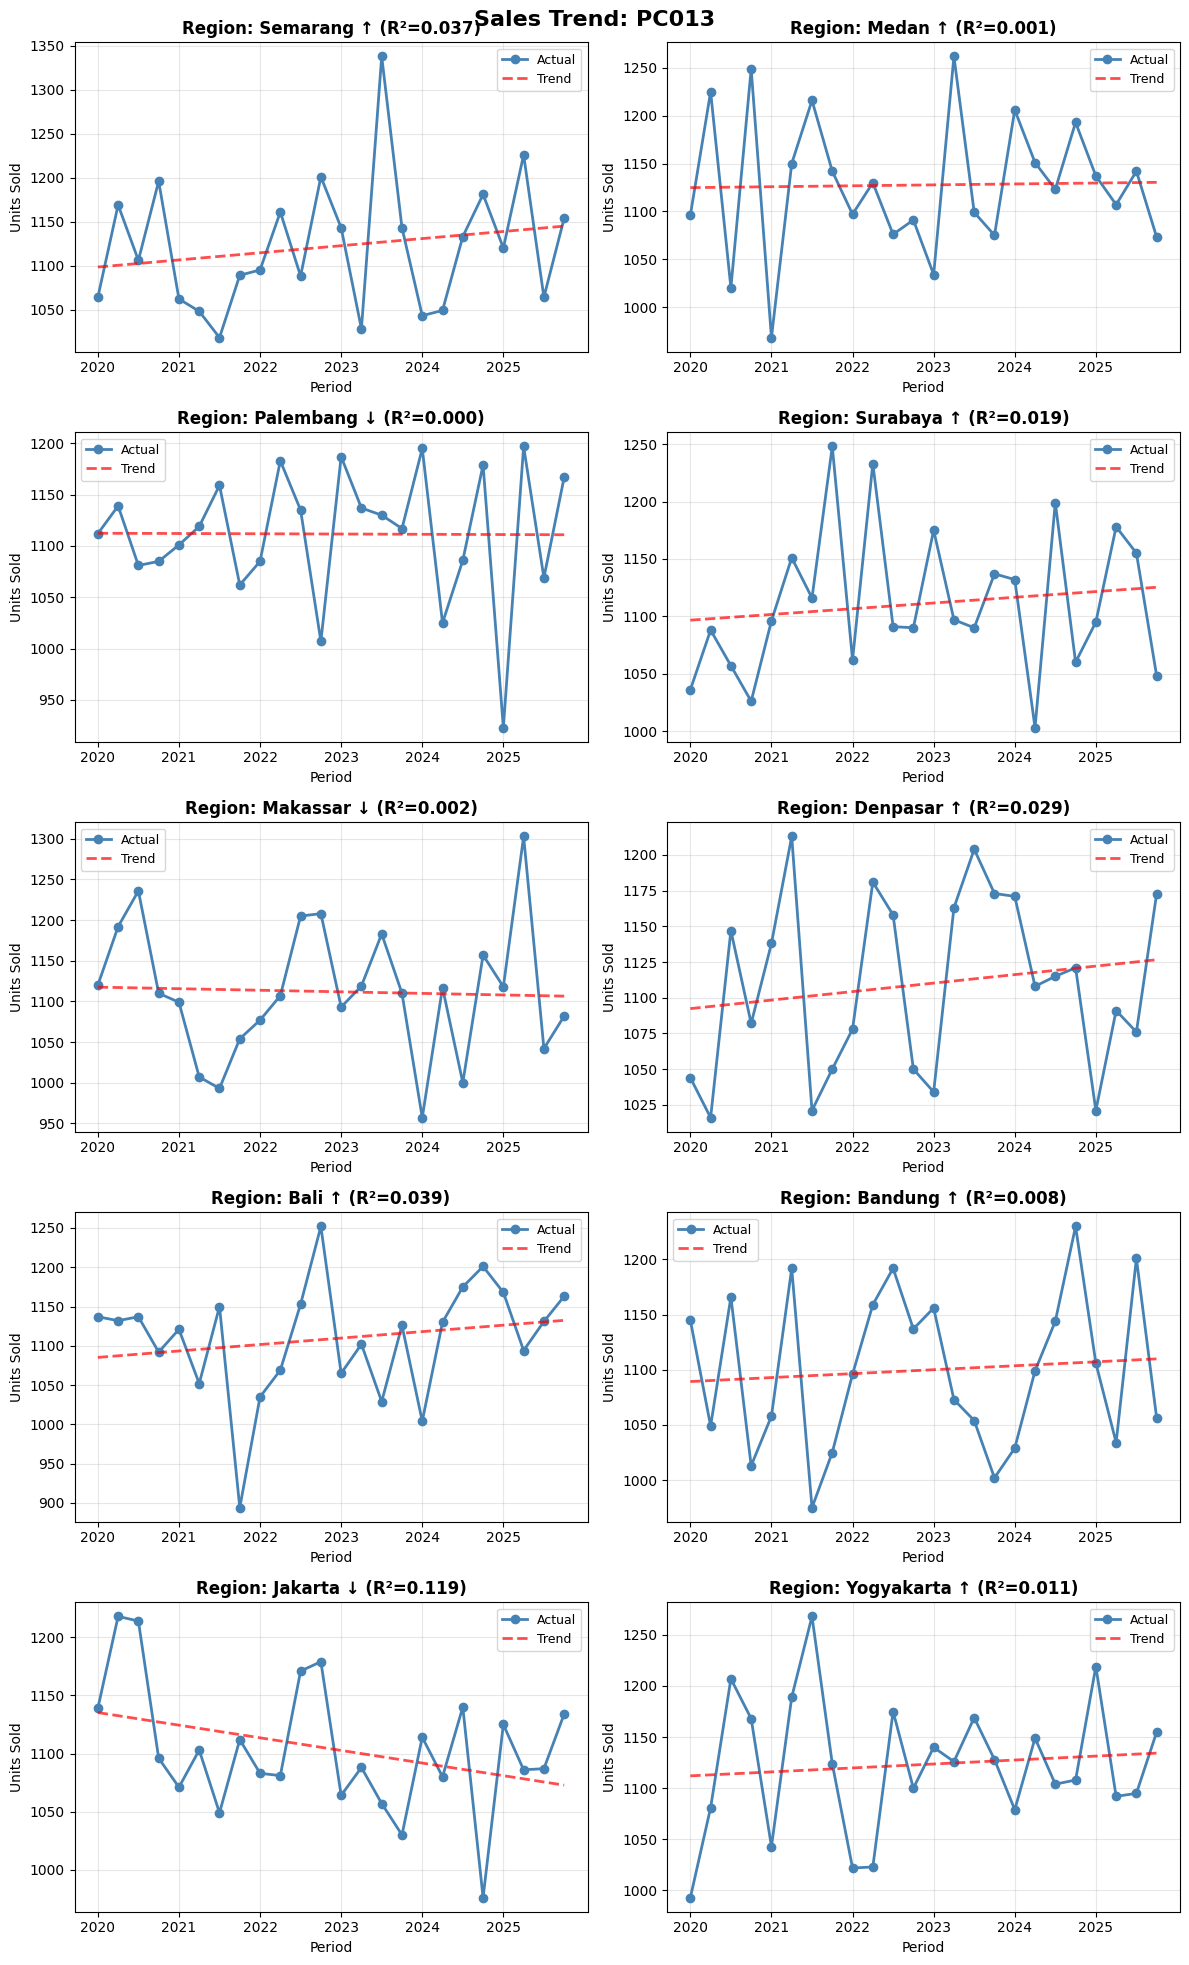

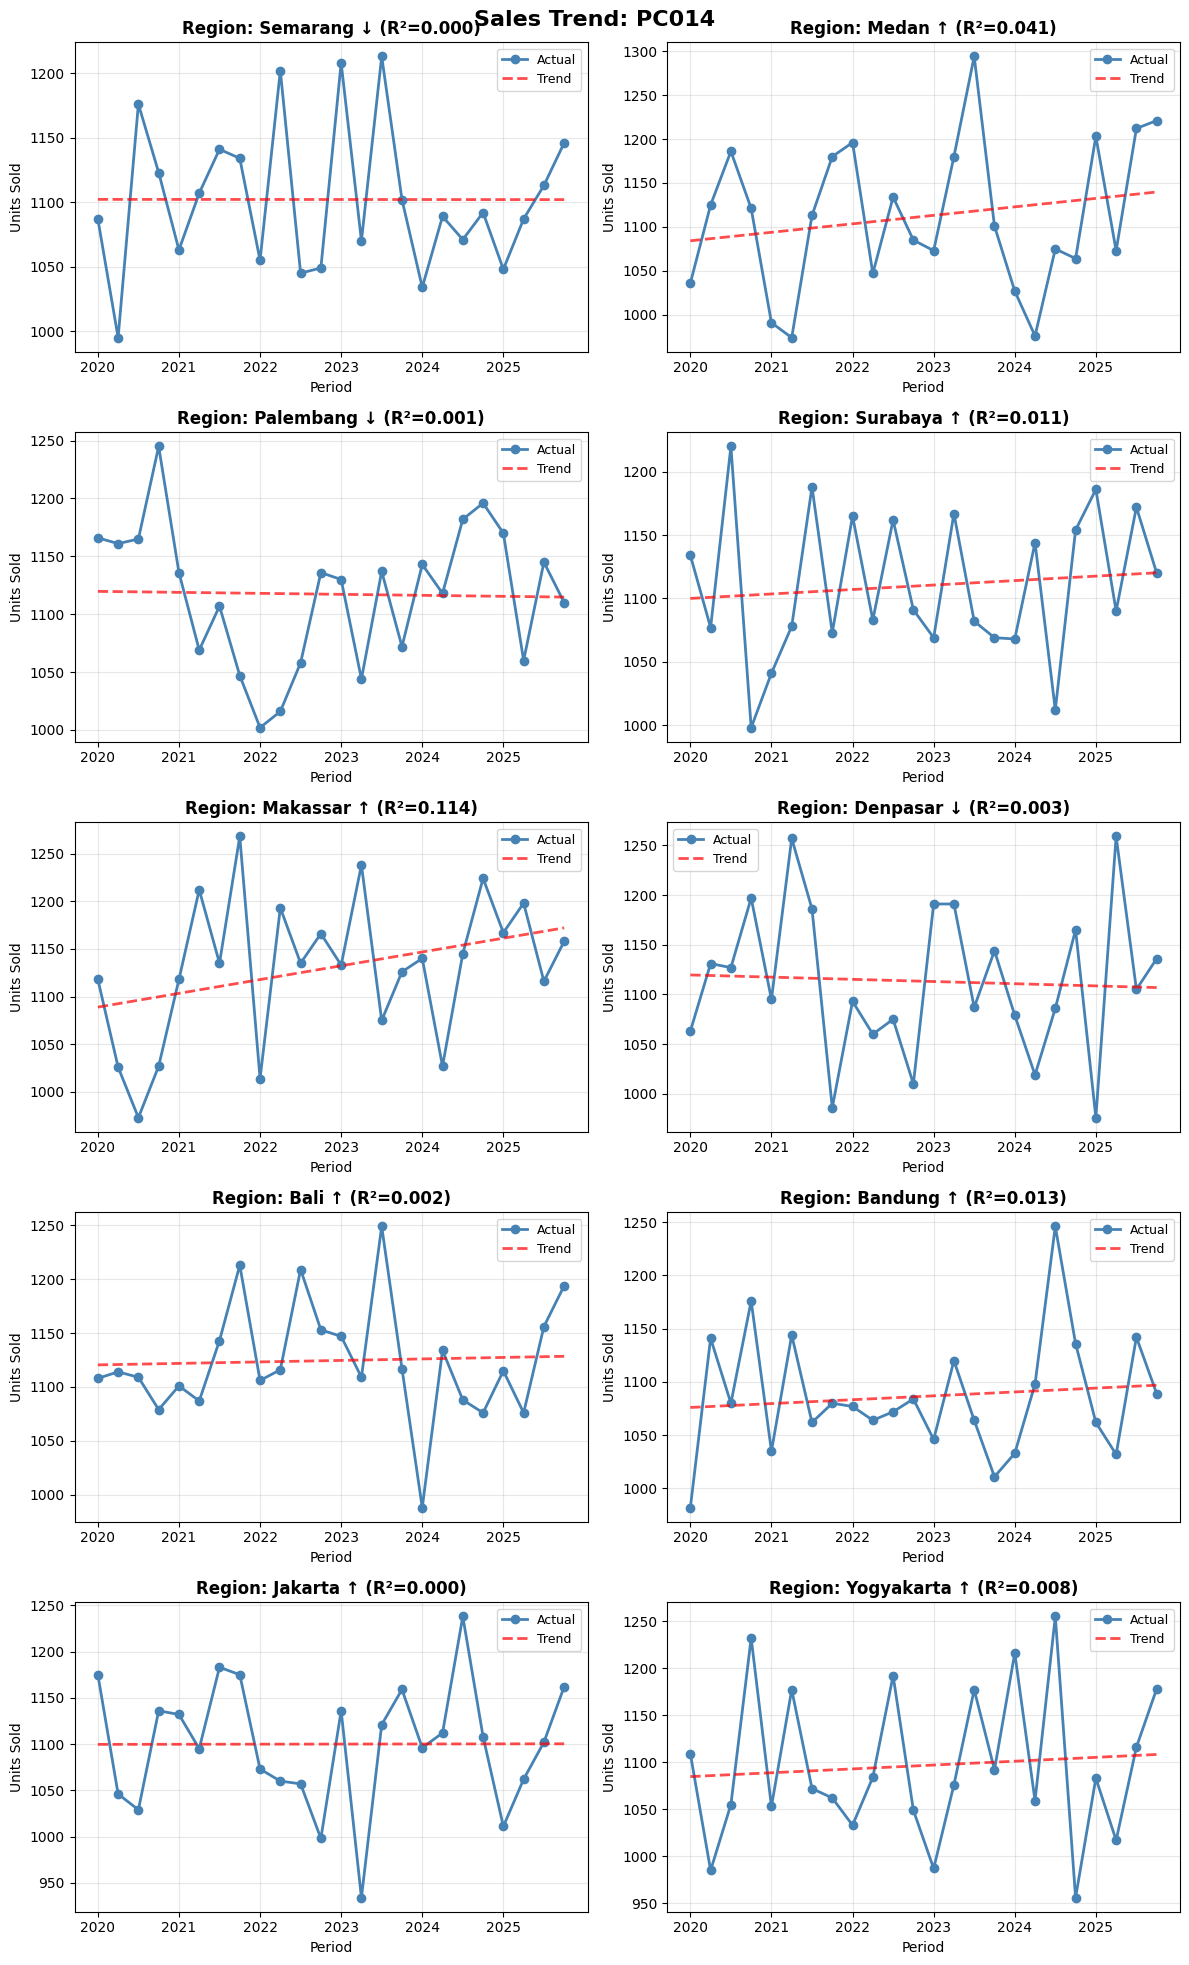

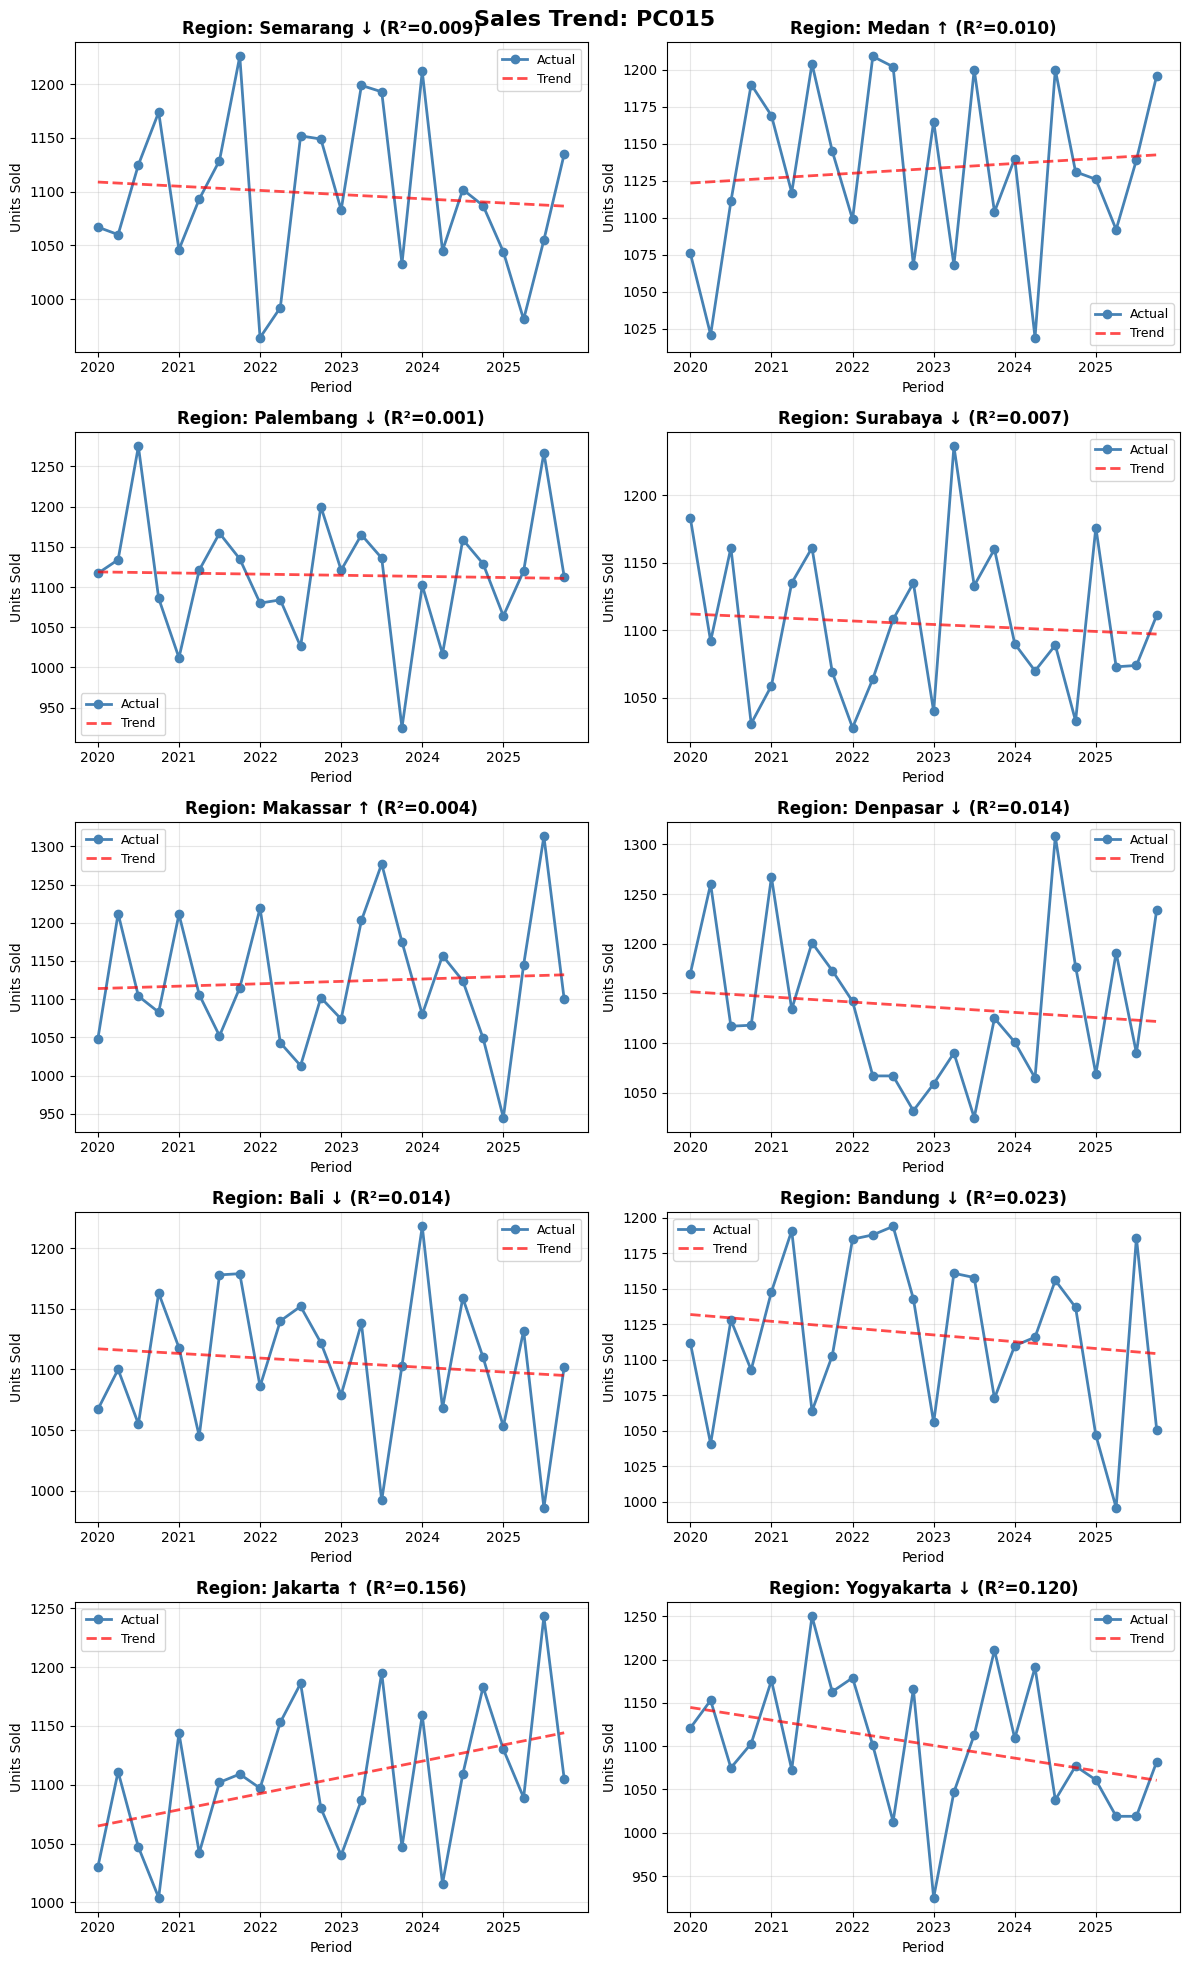

In [13]:
list_region = sales_data['region'].unique()

for product in product_id:
    regions_for_product = [r for r in list_region if (product, r) in unit_sold_region.index]
    
    if not regions_for_product:
        continue
    
    n_regions = len(regions_for_product)
    cols = 2  # 2 kolom per baris
    rows = math.ceil(n_regions / cols)

    fig, ax = plt.subplots(rows, cols, figsize=(12, 4*rows))
    fig.suptitle(f'Sales Trend: {product}', fontsize=16, fontweight='bold')

    if n_regions > 1:
        ax = ax.flatten()
    else:
        ax = [ax]

    for i, region in enumerate(regions_for_product):
        data = unit_sold_region.loc[(product, region)]
        
        x = np.arange(len(data))
        y = data.values
        
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        line = slope * x + intercept
        
        ax[i].plot(x, y, marker='o', linewidth=2, markersize=6, label='Actual', color='steelblue')
        
        ax[i].plot(x, line, '--', linewidth=2, color='red', alpha=0.7, label='Trend')
        
        trend_direction = "↑" if slope > 0 else "↓" if slope < 0 else "→"
        ax[i].set_title(f'Region: {region} {trend_direction} (R²={r_value**2:.3f})', 
                        fontsize=12, fontweight='bold')
        ax[i].set_xlabel('Period')
        ax[i].set_ylabel('Units Sold')
        ax[i].grid(True, alpha=0.3)
        ax[i].legend(loc='best', fontsize=9)
        
        periods = data.index.astype(str)
        years = [p[:4] for p in periods]

        year_indices = []
        year_labels = []
        seen_years = set()
        for idx, year in enumerate(years):
            if year not in seen_years:
                year_indices.append(idx)
                year_labels.append(year)
                seen_years.add(year)
        
        ax[i].set_xticks(year_indices)
        ax[i].set_xticklabels(year_labels, rotation=0)

    for j in range(n_regions, len(ax)):
        fig.delaxes(ax[j])
    
    plt.tight_layout()
    plt.show()

### Mann-Kendall Test

Berdasarkan hasil **uji Mann-Kendall**, produk **PC007** memiliki **nilai P-Value sebesar 0.096**, yang merupakan **nilai paling mendekati tingkat signifikansi** di antara seluruh produk. Selain itu, nilai **Kendall’s Tau sebesar 0.246** juga merupakan yang **tertinggi**, menunjukkan adanya **tren positif** pada penjualan produk tersebut, meskipun **belum signifikan secara statistik**.

Tren peningkatan ini berpotensi untuk **diperkuat melalui pelaksanaan kampanye marketing**, mengingat **produk PC007 sebelumnya belum pernah menjalani aktivitas promosi**.

In [14]:
mk_test_data = dict(tuple(sales_sum.groupby("product_id", sort=False)))

for ids in product_id:
    result = mk.original_test(mk_test_data[ids]['units_sold'])
    print(f"\n=== Product ID: {ids} ===")
    print(f"Trend Direction : {result.trend}")
    print(f"P-Value         : {result.p}")
    print(f"Tau             : {result.Tau}")
    print(f"S Statistic     : {result.s}")
    print(f"Variance S      : {result.var_s}")
    print(f"Z-Statistic     : {result.z}")
    print(f"Hypothesis H0   : {'Reject' if result.h else 'Fail to Reject'} (trend {'ada' if result.h else 'tidak ada'})")


=== Product ID: PC001 ===
Trend Direction : no trend
P-Value         : 0.4419310120112123
Tau             : 0.11594202898550725
S Statistic     : 32.0
Variance S      : 1625.3333333333333
Z-Statistic     : 0.7689364932156956
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC002 ===
Trend Direction : no trend
P-Value         : 0.6024416860423838
Tau             : -0.07971014492753623
S Statistic     : -22.0
Variance S      : 1625.3333333333333
Z-Statistic     : -0.5208924631461164
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC003 ===
Trend Direction : no trend
P-Value         : 0.823349012100195
Tau             : 0.036231884057971016
S Statistic     : 10.0
Variance S      : 1625.3333333333333
Z-Statistic     : 0.22323962706262132
Hypothesis H0   : Fail to Reject (trend tidak ada)

=== Product ID: PC004 ===
Trend Direction : no trend
P-Value         : 0.28615732110495795
Tau             : 0.15942028985507245
S Statistic     : 44.0
Variance S  

Untuk mempermudah **perbandingan performa antar produk**, matriks berikut menampilkan **posisi masing-masing produk berdasarkan indeks stabilitas dan rata-rata pertumbuhan penjualan**.

Interpretasi posisi produk dalam matriks adalah sebagai berikut:
- **Kuadran kanan atas**: produk dengan **pertumbuhan positif dan stabil**, mencerminkan performa terbaik.  
- **Kuadran kanan bawah**: produk dengan **penurunan yang stabil**, menunjukkan tren negatif yang konsisten.  
- **Kuadran kiri atas**: produk dengan **pertumbuhan positif namun tidak konsisten**, kemungkinan dipengaruhi oleh faktor musiman.  
- **Kuadran kiri bawah**: produk dengan **pertumbuhan negatif dan penjualan yang tidak stabil**, mencerminkan performa terlemah.

Melalui pemetaan ini, setiap produk dapat dievaluasi secara komprehensif berdasarkan **konsistensi dan arah pertumbuhan penjualannya**.

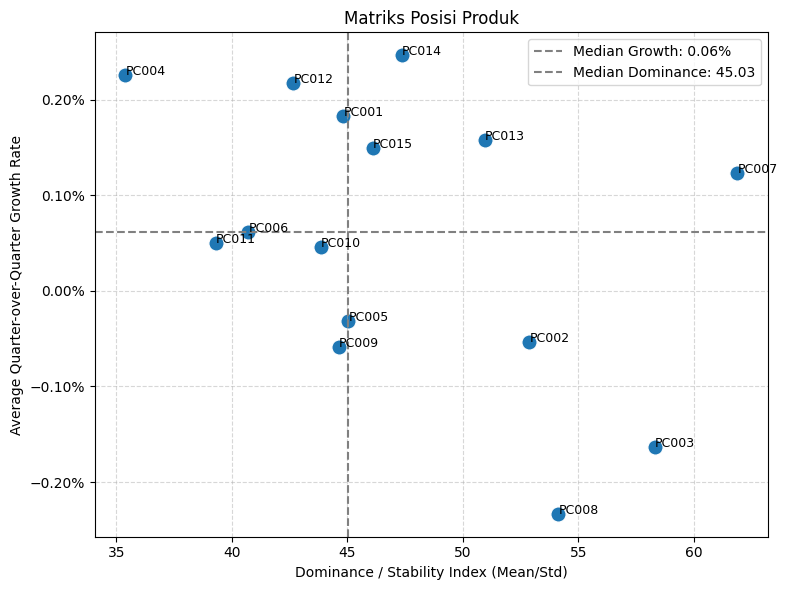

In [15]:
sales_sum = sales_sum.sort_values(['product_id', 'month'])
sales_sum['pct_change'] = sales_sum.groupby('product_id')['units_sold'].pct_change()
growth = sales_sum.groupby('product_id')['pct_change'].mean().to_frame('growth_rate')
stats = sales_sum.groupby('product_id')['units_sold'].agg(['mean', 'std'])
stats['dominance_index'] = stats['mean'] / stats['std']
stats = stats.join(growth)

median_dom = stats['dominance_index'].median()
median_growth = stats['growth_rate'].median()

plt.figure(figsize=(8,6))
sns.scatterplot(data=stats, x='dominance_index', y='growth_rate', s=120)

plt.axhline(median_growth, color='gray', linestyle='--', label=f'Median Growth: {median_growth:.2%}')
plt.axvline(median_dom, color='gray', linestyle='--', label=f'Median Dominance: {median_dom:.2f}')

for i, txt in enumerate(stats.index):
    plt.text(stats['dominance_index'].iloc[i]+0.02, 
             stats['growth_rate'].iloc[i], txt, fontsize=9)

plt.title("Matriks Posisi Produk")
plt.xlabel("Dominance / Stability Index (Mean/Std)")
plt.ylabel("Average Quarter-over-Quarter Growth Rate")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

### Hasil dan Analisis

Berdasarkan hasil pengolahan dan analisis data, terdapat **tiga kandidat produk bintang** yang menunjukkan potensi pertumbuhan penjualan di masa mendatang, yaitu **PC007**, **PC013**, dan **PC014**.

Dari hasil analisis tren menggunakan **garis regresi**, ketiga produk tersebut menunjukkan **pola peningkatan positif**. Namun, nilai tren **PC013** masih berada di bawah **PC004** dan **PC011**. Produk **PC007** menjadi perhatian utama karena **belum pernah dilakukan aktivitas marketing**, sehingga potensi peningkatannya masih terbuka lebar. Sebaliknya, **PC013** telah menjalani satu kali kegiatan marketing, sementara **PC014** telah tiga kali, yang menunjukkan tingkat eksplorasi pasar yang lebih tinggi.

Dari sisi **kontribusi terhadap pendapatan**, **PC007** dan **PC014** menempati posisi dua tertinggi dalam total revenue, sedangkan **PC013** berada beberapa peringkat di bawah keduanya.

Analisis berdasarkan **performa penjualan per region** menunjukkan bahwa:
- **PC007** memiliki performa yang **positif dan stabil di sebagian besar region**, dengan pengecualian di **Makassar**, yang dapat menjadi prioritas untuk pelaksanaan marketing berikutnya.  
- **PC013** memiliki pola serupa, dengan performa yang baik di hampir seluruh region, kecuali **Jakarta**, sehingga strategi promosi dapat difokuskan di wilayah tersebut.  
- **PC014** menunjukkan **kinerja positif dan stabil di seluruh region**, menandakan persebaran performa yang paling merata.

Berdasarkan hasil **uji Mann-Kendall**, ketiga produk belum menunjukkan tren yang signifikan secara statistik. Namun, **PC007 memiliki nilai P-Value terendah sebesar 0.096**, yang berarti kemungkinan tren tersebut muncul secara kebetulan hanya sekitar **9.6%**. Sebagai perbandingan, **PC013 memiliki nilai P-Value sebesar 0.53** (53% kemungkinan tren acak) dan **PC014 sebesar 0.25** (25% kemungkinan tren acak).  

Dari sisi **nilai Kendall’s Tau**, **PC007 mencatat nilai tertinggi sebesar 0.24**, menunjukkan **tren positif paling kuat** dibandingkan dua produk lainnya. Sementara itu, **PC013** memiliki nilai Tau mendekati nol, yang menunjukkan **tren nyaris tidak ada**, dan **PC014** memiliki nilai sebesar 0.14, yang masih di bawah PC007.

Selanjutnya, berdasarkan **posisi produk dalam matriks indeks stabilitas dan growth rate**, diperoleh hasil sebagai berikut:
- **PC007** menunjukkan **penjualan yang paling stabil** dengan pertumbuhan positif di atas median.  
- **PC014** memiliki **pertumbuhan yang tinggi namun kurang stabil** dibandingkan PC007 dan PC013.  
- **PC013** berada di posisi menengah, namun dengan **indeks stabilitas yang masih jauh di bawah PC007**.

Secara keseluruhan, temuan ini menunjukkan bahwa **PC007 merupakan kandidat terkuat untuk dikategorikan sebagai produk bintang**, dengan potensi pertumbuhan yang masih dapat dioptimalkan melalui strategi marketing yang tepat.

### Kesimpulan

Berdasarkan hasil analisis menyeluruh, **PC007** ditetapkan sebagai **produk bintang** karena menunjukkan performa penjualan yang paling unggul dibandingkan produk lainnya. Produk ini merupakan **penyumbang pendapatan tertinggi kedua**, memiliki **pangsa pasar yang kuat di hampir seluruh region**, serta menunjukkan **tren penjualan positif** dengan **probabilitas tren kebetulan paling rendah** dan **kekuatan tren tertinggi** berdasarkan hasil **uji Mann-Kendall**.

Selain itu, **tingkat stabilitas penjualan PC007 relatif tinggi** dengan pertumbuhan yang konsisten. Fakta bahwa performa ini dicapai **tanpa adanya aktivitas marketing sebelumnya** menunjukkan bahwa **potensi peningkatan penjualan masih sangat besar** apabila strategi promosi dan kampanye pemasaran diterapkan secara efektif.

# Product Cannibalization Analysis


Mengevaluasi apakah peluncuran produk baru mengurangi penjualan produk lain dalam kategori yang sama.

### Metode
*Product Cannibalization Analysis* dilakukan dengan mengukur hubungan tren penjualan antara produk lama dan produk baru. Metode yang digunakan adalah Metode *Spearman Rank Correlation*, yaitu metode yang mengukur tingkat hubungan antara dua variabel berdasarkan ranking [1].

Metode *Spearman Rank Correlation* karena metode ini tidak mengharuskan hubungan antarvariabel bersifat linear, dan lebih tahan terhadap pengaruh outlier

### Rumus Spearman Rank Correlation
Rumus umum korelasi Spearman ($\rho$) adalah:

$$\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}$$

Keterangan:
- $d_i$ = selisih antara ranking penjualan produk lama dan produk baru pada periode ke-$i$  
- $n$ = jumlah periode pengamatan  

Nilai $\rho$ berada dalam rentang $-1 \leq \rho \leq 1$

| Nilai ρ (Spearman) | Interpretasi | Implikasi terhadap *Cannibalization* |
|:--:|:--|:--|
| **ρ < −0.4** | Korelasi negatif kuat | Indikasi kuat terjadi *cannibalization* |
| **−0.4 ≤ ρ < −0.2** | Korelasi negatif sedang | Kemungkinan sedang terjadi *cannibalization* |
| **−0.2 ≤ ρ ≤ 0.2** | Korelasi lemah / tidak signifikan | Indikasi lemah kemungkinan cannibalization. |
| **ρ > 0.2** | Korelasi positif | Tidak ada indikasi kuat cannibalization. |

### Grafik
Grafik berikut menggambarkan tren penjualan bulanan antara *produk lama* dan *produk baru* dalam kurun waktu satu minggu setelah perilisan produk baru.  
Sumbu horizontal (X) menunjukkan **periode waktu (hari)**, sedangkan sumbu vertikal (Y) menunjukkan **jumlah unit terjual (units sold)**.
Setiap garis merepresentasikan pergerakan penjualan masing-masing produk:
- Garis **biru** menunjukkan *produk lama*.
- Garis **oranye** menunjukkan *produk baru*.


In [16]:
sales = pd.read_csv('Dataset/fmcg_personalcare/sales.csv', parse_dates=['date'])
products = pd.read_csv('Dataset/fmcg_personalcare/products.csv', parse_dates=['launch_date'])

sales_with_products = sales.merge(products, on='product_id', how='left')
sales_with_products['month'] = sales_with_products['date'].dt.to_period('M')

monthly_sales = (
    sales_with_products
    .groupby(['month', 'product_id', 'product_name', 'brand', 'type'])
    .agg({'units_sold':'sum', 'revenue':'sum'})
    .reset_index()
)

sales_with_products.head()
products.sort_values('launch_date')

product_id                                      product_name  \
0       PC001              Sunsilk Smooth & Shine Shampoo 340ml   
2       PC003                  Lifebuoy Total10 Body Wash 400ml   
1       PC002             Sunsilk Black Shine Conditioner 340ml   
8       PC009                    Clear Cool Sport Menthol 340ml   
14      PC015                  Lifebuoy Hand Sanitizer Gel 50ml   
3       PC004                 Lifebuoy Mild Care Handwash 200ml   
11      PC012              Vaseline Intensive Care Lotion 200ml   
4       PC005                   Dove Deep Moisture Lotion 200ml   
5       PC006                 Dove Intense Repair Shampoo 340ml   
10      PC011              Ponds Bright Beauty Facial Foam 100g   
6       PC007                   Rexona Men Ice Cool Spray 150ml   
7       PC008            Rexona Women Shower Clean Roll-on 50ml   
9       PC010  Love Beauty & Planet Coconut Water Shampoo 400ml   
12      PC013               Sunsilk Anti Hairfall Shampoo 340ml   
13      PC014                     Dove Men+Care Body Wash 400ml   

                   brand         type  size_ml  base_price launch_date  
0                Sunsilk      Shampoo      340       32000  2020-02-15  
2               Lifebuoy    Body Wash      400       28000  2020-03-20  
1                Sunsilk  Conditioner      340       33000  2020-06-10  
8                  Clear      Shampoo      340       34000  2020-09-20  
14              Lifebuoy    Sanitizer       50       18000  2020-12-01  
3               Lifebuoy     Handwash      200       25000  2021-05-01  
11              Vaseline       Lotion      200       30000  2021-08-05  
4                   Dove       Lotion      200       35000  2021-11-12  
5                   Dove      Shampoo      340       36000  2022-01-25  
10                 Ponds  Facial Foam      100       35000  2022-04-10  
6                 Rexona    Deodorant      150       40000  2022-06-02  
7                 Rexona    Deodorant       50       28000  2023-02-14  
9   Love Beauty & Planet      Shampoo      400       42000  2023-03-18  
12               Sunsilk      Shampoo      340       32000  2024-01-15  
13                  Dove    Body Wash      400       38000  2024-06-01

Berikut merupakan kategori produk yang memiliki lebih dari satu varian, sehingga berpotensi mengalami *product cannibalization* akibat adanya persaingan internal antarproduk dalam kategori yang sama.

| Kategori | Jumlah Produk |
|:----------|:--------------:|
| Body Wash |2|
| Deodorant | 2 |
| Lotion | 2 |
| Shampoo | 5 |


In [32]:
import matplotlib.pyplot as plt
def analyze_cannibalization(prod_lama, prod_baru):
    if prod_lama not in products['product_id'].values or prod_baru not in products['product_id'].values:
        print("Salah satu product_id tidak ditemukan di master produk.")
        return

    lama = products.loc[products['product_id'] == prod_lama].iloc[0]
    baru = products.loc[products['product_id'] == prod_baru].iloc[0]

    print(f" Product Cannibalization Analysis")
    print(f"- Produk Lama : {lama['product_name']} ({lama['product_id']}) ({lama['brand']}, {lama['type']})")
    print(f"- Produk Baru : {baru['product_name']} ({baru['product_id']}) ({baru['brand']}, {baru['type']})")

    if lama['type'] == baru['type']:
        df = sales_with_products[sales_with_products['type'] == lama['type']]
        title = f"Product Cannibalization Analysis - Kategori {lama['type']}\n{lama['product_name']} ({prod_lama}) vs {baru['product_name']} ({prod_baru})"
    else:
        print("Produk tidak memiliki brand atau type yang sama — sulit dibandingkan.")
        return

    start_date = baru['launch_date']
    end_date = baru['launch_date'] + pd.Timedelta(weeks=1)
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

    plt.figure(figsize=(10,5))
    for pid, label in [(prod_lama, 'Produk Lama'), (prod_baru, 'Produk Baru')]:
        temp = df[df['product_id'] == pid]
        if temp.empty:
            print(f"Data penjualan untuk {pid} tidak ditemukan setelah tanggal rilis produk lama.")
            continue
        prod_name = temp['product_name'].iloc[0]
        temp = (
        temp.groupby('date', as_index=False)['units_sold']
        .sum()
        .sort_values('date')
    )
        plt.plot(temp['date'], temp['units_sold'], marker='o',
         label=f"{prod_name} ({pid}) - {'Lama' if pid == prod_lama else 'Baru'}")

        

    plt.legend()
    plt.title(title + "\n(Data dihitung mulai dari rilis produk baru sampai 1 minggu setelahnya)")
    plt.xlabel('Hari')
    plt.ylabel('Units Sold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_pivot = df.pivot_table(index='date', columns='product_id', values='units_sold', fill_value=0)
        

    if prod_lama in df_pivot.columns and prod_baru in df_pivot.columns:
        corr = df_pivot[prod_lama].corr(df_pivot[prod_baru], method='spearman')
        print(f"📈 Korelasi Penjualan antara {prod_lama} dan {prod_baru}: {corr:.2f}")
        if corr < -0.4:
            print(" Indikasi kuat terjadinya cannibalization.\n")
        elif corr < -0.2:
            print(" Indikasi sedang kemungkinan cannibalization.\n")
        elif corr <= 0.2:
            print(" Indikasi lemah kemungkinan cannibalization.\n")
        else:
            print(" Tidak ada indikasi kuat cannibalization.\n")
    else:
        print("Tidak cukup data untuk menghitung korelasi.\n")


====== Analisis Cannibalization Produk Tipe Body Wash ======

 Product Cannibalization Analysis
- Produk Lama : Lifebuoy Total10 Body Wash 400ml (PC003) (Lifebuoy, Body Wash)
- Produk Baru : Dove Men+Care Body Wash 400ml (PC014) (Dove, Body Wash)


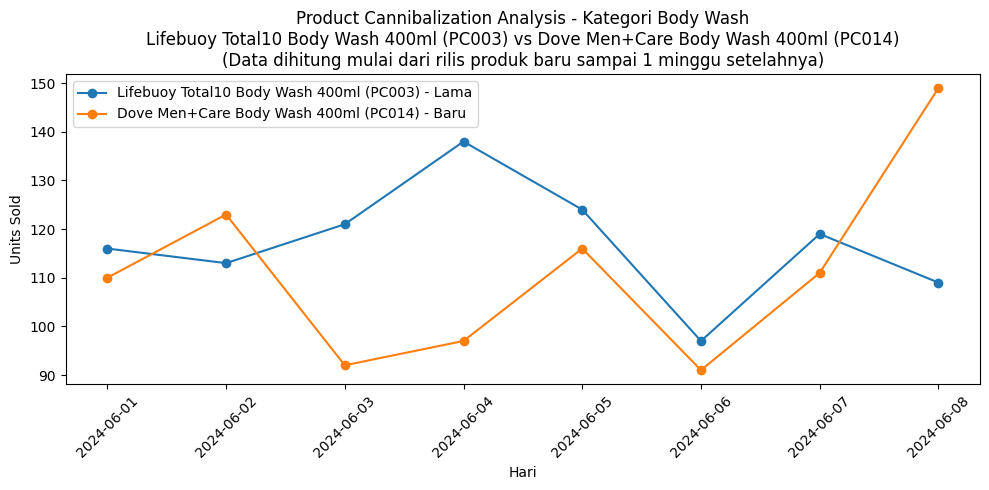

📈 Korelasi Penjualan antara PC003 dan PC014: -0.23
 Indikasi sedang kemungkinan cannibalization.



In [33]:
print("====== Analisis Cannibalization Produk Tipe Body Wash ======\n")
analyze_cannibalization('PC003', 'PC014')

====== Analisis Cannibalization Produk Tipe Deodorant ======

 Product Cannibalization Analysis
- Produk Lama : Rexona Men Ice Cool Spray 150ml (PC007) (Rexona, Deodorant)
- Produk Baru : Rexona Women Shower Clean Roll-on 50ml (PC008) (Rexona, Deodorant)


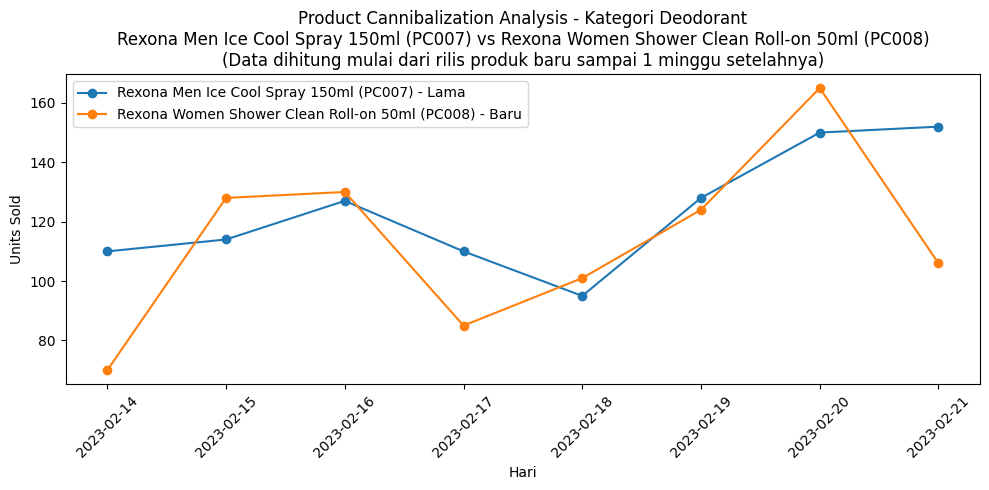

📈 Korelasi Penjualan antara PC007 dan PC008: 0.75
 Tidak ada indikasi kuat cannibalization.



In [34]:
print("====== Analisis Cannibalization Produk Tipe Deodorant ======\n")
analyze_cannibalization('PC007', 'PC008')

====== Analisis Cannibalization Produk Tipe Lotion ======

 Product Cannibalization Analysis
- Produk Lama : Vaseline Intensive Care Lotion 200ml (PC012) (Vaseline, Lotion)
- Produk Baru : Dove Deep Moisture Lotion 200ml (PC005) (Dove, Lotion)


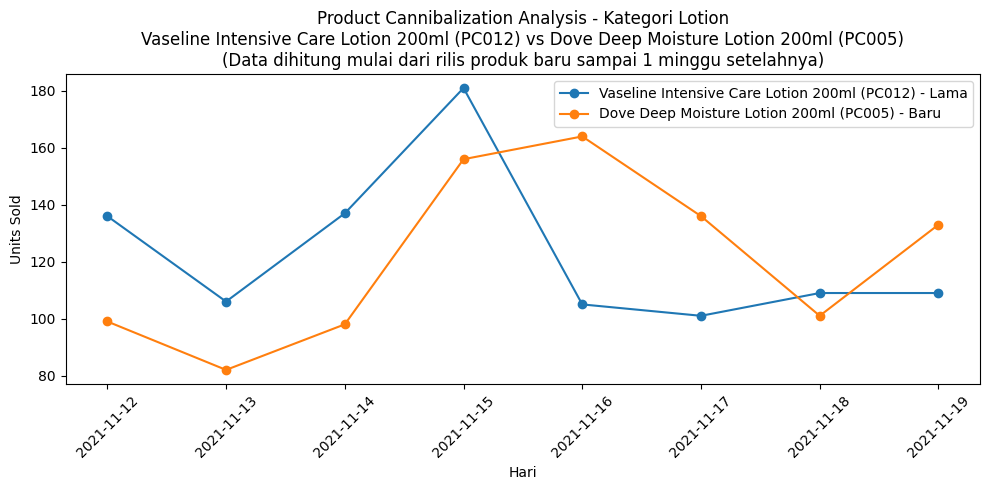

📈 Korelasi Penjualan antara PC012 dan PC005: 0.10
 Indikasi lemah kemungkinan cannibalization.



In [35]:
print("====== Analisis Cannibalization Produk Tipe Lotion ======\n")
analyze_cannibalization('PC012', 'PC005')

====== Analisis Cannibalization Produk Tipe Shampoo ======

 Product Cannibalization Analysis
- Produk Lama : Sunsilk Smooth & Shine Shampoo 340ml (PC001) (Sunsilk, Shampoo)
- Produk Baru : Clear Cool Sport Menthol 340ml (PC009) (Clear, Shampoo)


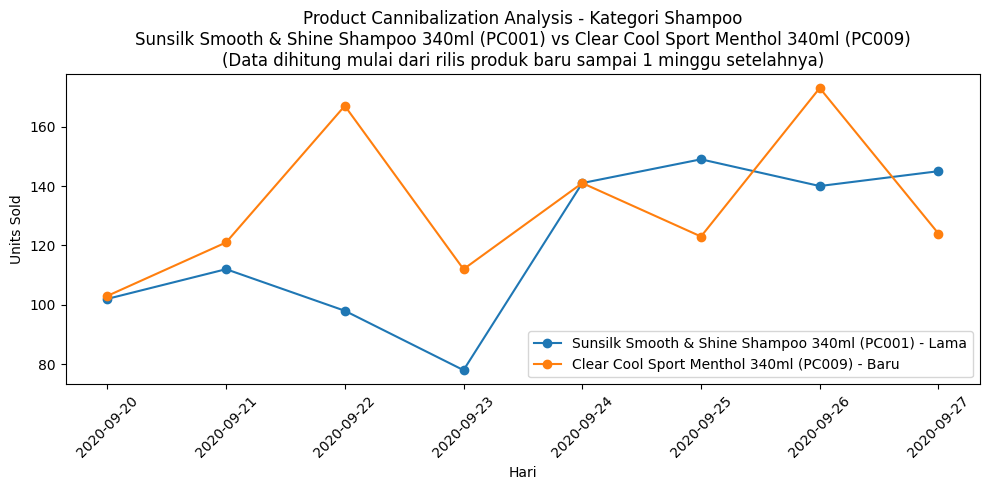

📈 Korelasi Penjualan antara PC001 dan PC009: 0.21
 Tidak ada indikasi kuat cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Sunsilk Smooth & Shine Shampoo 340ml (PC001) (Sunsilk, Shampoo)
- Produk Baru : Dove Intense Repair Shampoo 340ml (PC006) (Dove, Shampoo)


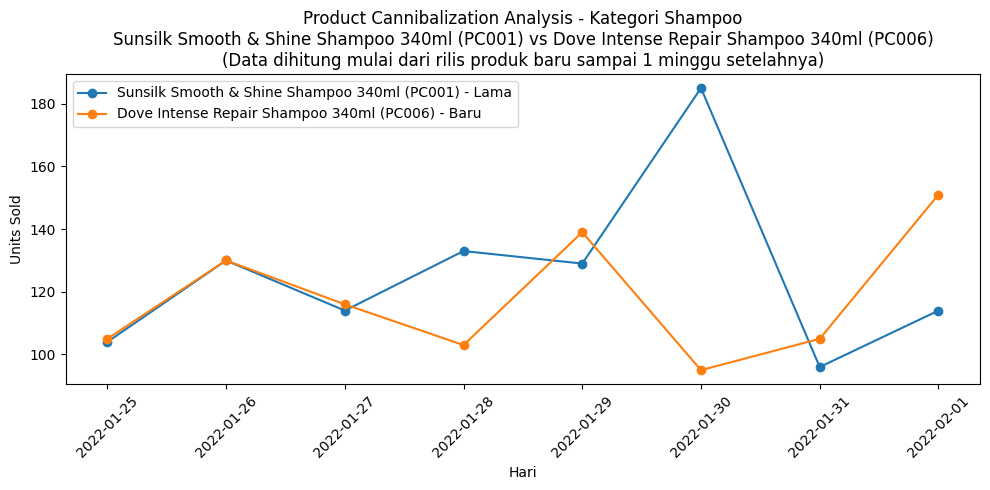

📈 Korelasi Penjualan antara PC001 dan PC006: -0.33
 Indikasi sedang kemungkinan cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Sunsilk Smooth & Shine Shampoo 340ml (PC001) (Sunsilk, Shampoo)
- Produk Baru : Love Beauty & Planet Coconut Water Shampoo 400ml (PC010) (Love Beauty & Planet, Shampoo)


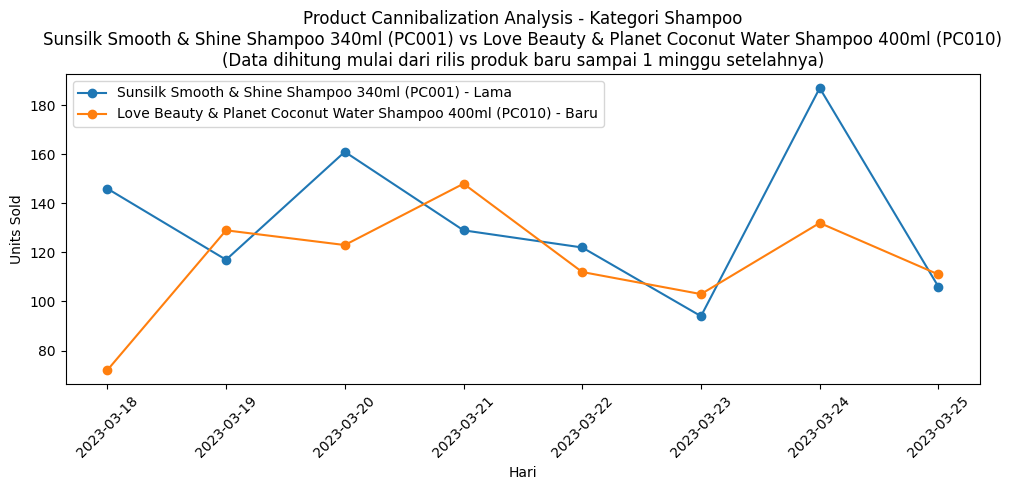

📈 Korelasi Penjualan antara PC001 dan PC010: -0.07
 Indikasi lemah kemungkinan cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Sunsilk Smooth & Shine Shampoo 340ml (PC001) (Sunsilk, Shampoo)
- Produk Baru : Sunsilk Anti Hairfall Shampoo 340ml (PC013) (Sunsilk, Shampoo)


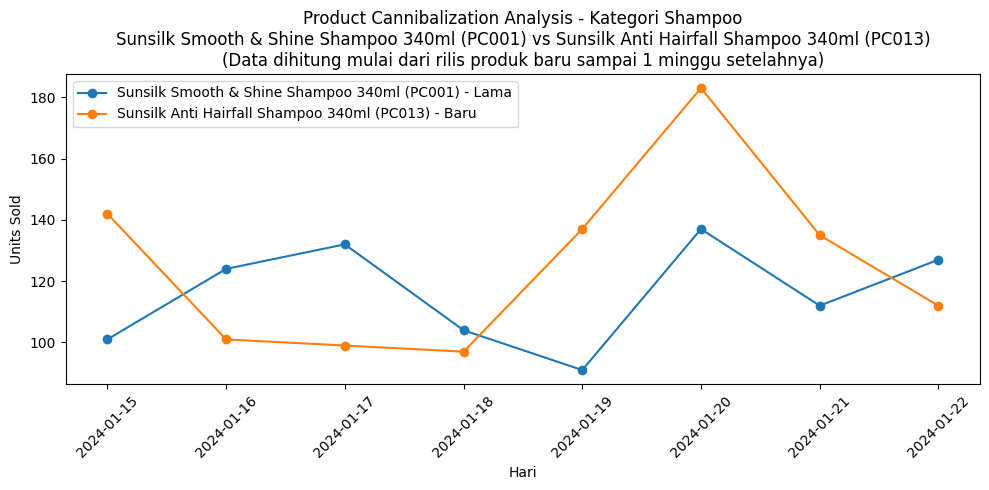

📈 Korelasi Penjualan antara PC001 dan PC013: -0.10
 Indikasi lemah kemungkinan cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Clear Cool Sport Menthol 340ml (PC009) (Clear, Shampoo)
- Produk Baru : Dove Intense Repair Shampoo 340ml (PC006) (Dove, Shampoo)


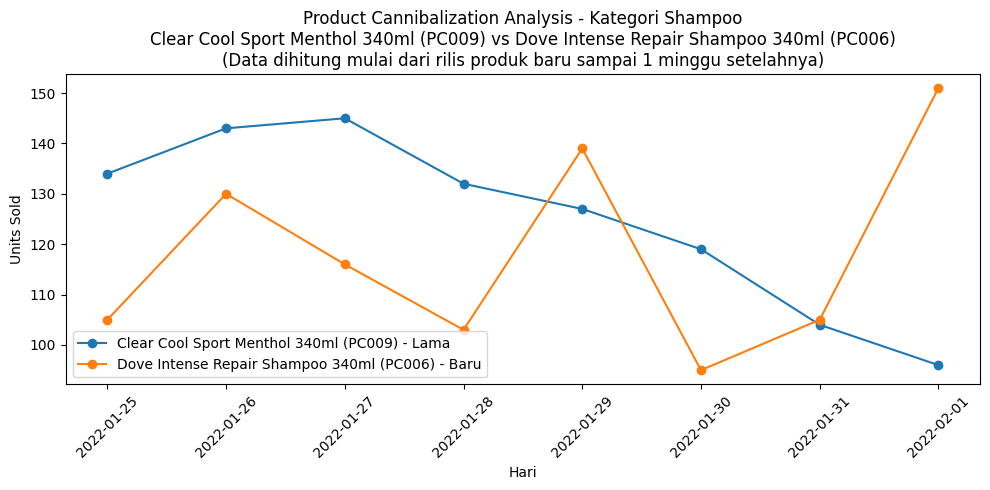

📈 Korelasi Penjualan antara PC009 dan PC006: -0.33
 Indikasi sedang kemungkinan cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Clear Cool Sport Menthol 340ml (PC009) (Clear, Shampoo)
- Produk Baru : Love Beauty & Planet Coconut Water Shampoo 400ml (PC010) (Love Beauty & Planet, Shampoo)


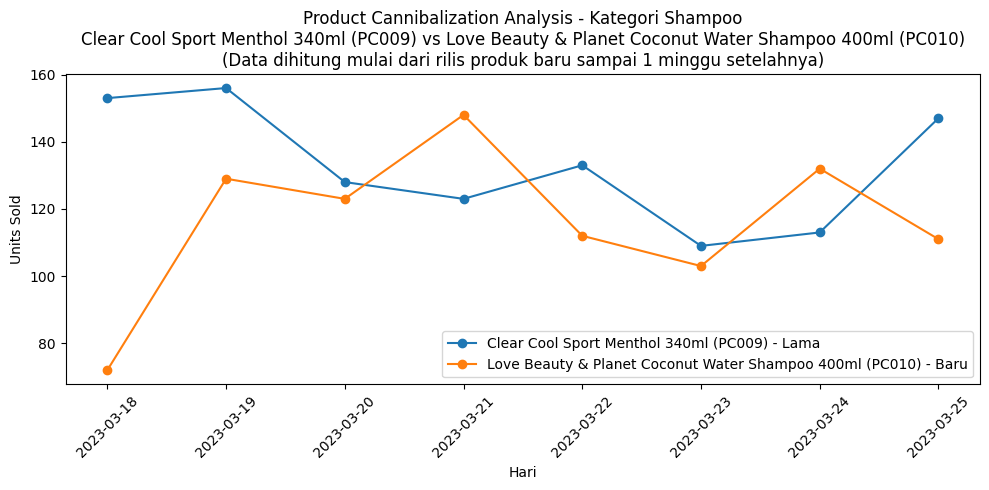

📈 Korelasi Penjualan antara PC009 dan PC010: -0.69
 Indikasi kuat terjadinya cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Clear Cool Sport Menthol 340ml (PC009) (Clear, Shampoo)
- Produk Baru : Sunsilk Anti Hairfall Shampoo 340ml (PC013) (Sunsilk, Shampoo)


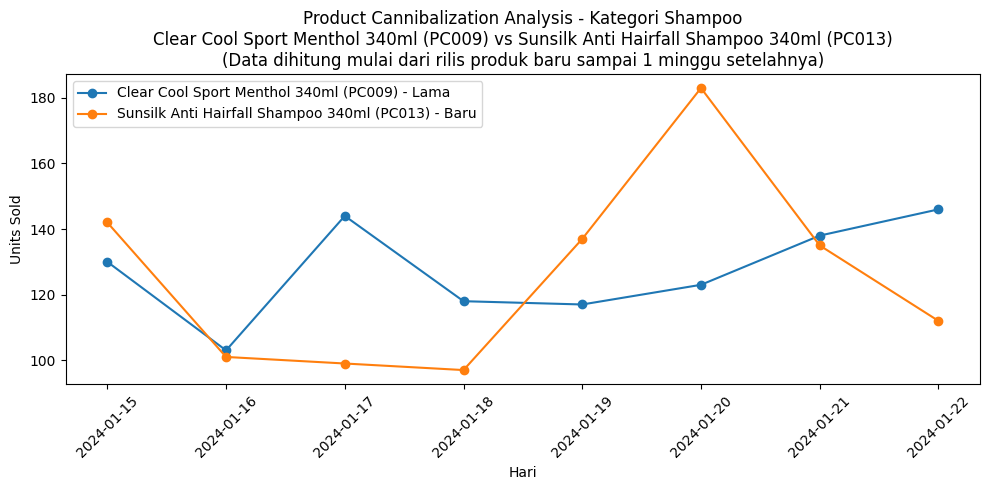

📈 Korelasi Penjualan antara PC009 dan PC013: 0.57
 Tidak ada indikasi kuat cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Dove Intense Repair Shampoo 340ml (PC006) (Dove, Shampoo)
- Produk Baru : Love Beauty & Planet Coconut Water Shampoo 400ml (PC010) (Love Beauty & Planet, Shampoo)


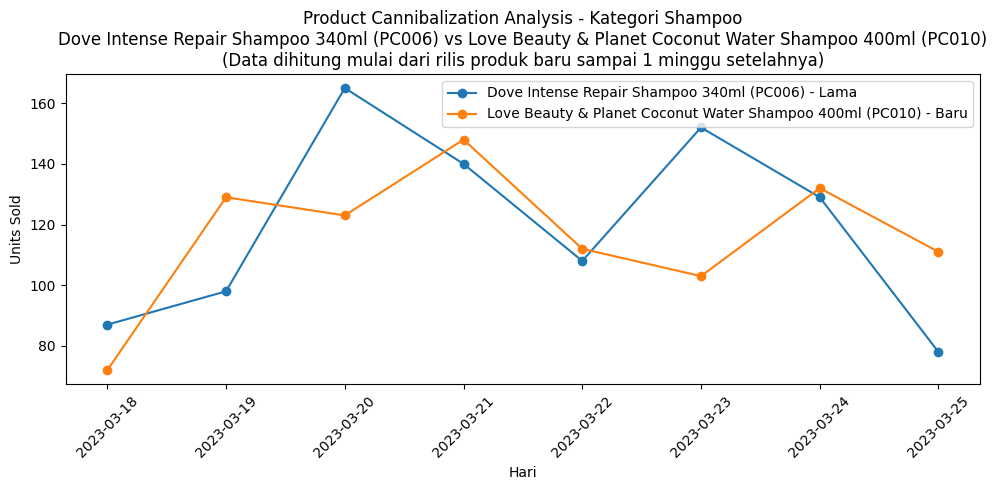

📈 Korelasi Penjualan antara PC006 dan PC010: -0.24
 Indikasi sedang kemungkinan cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Dove Intense Repair Shampoo 340ml (PC006) (Dove, Shampoo)
- Produk Baru : Sunsilk Anti Hairfall Shampoo 340ml (PC013) (Sunsilk, Shampoo)


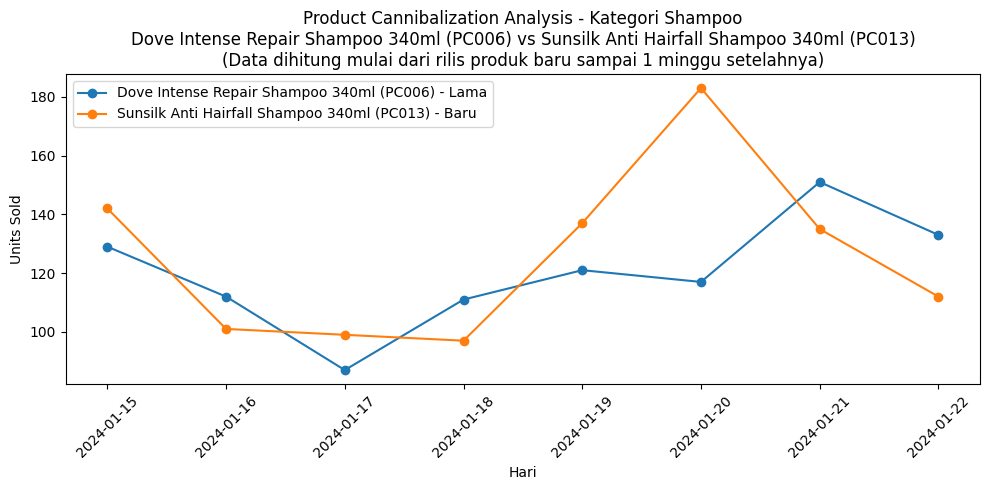

📈 Korelasi Penjualan antara PC006 dan PC013: 0.62
 Tidak ada indikasi kuat cannibalization.

 Product Cannibalization Analysis
- Produk Lama : Love Beauty & Planet Coconut Water Shampoo 400ml (PC010) (Love Beauty & Planet, Shampoo)
- Produk Baru : Sunsilk Anti Hairfall Shampoo 340ml (PC013) (Sunsilk, Shampoo)


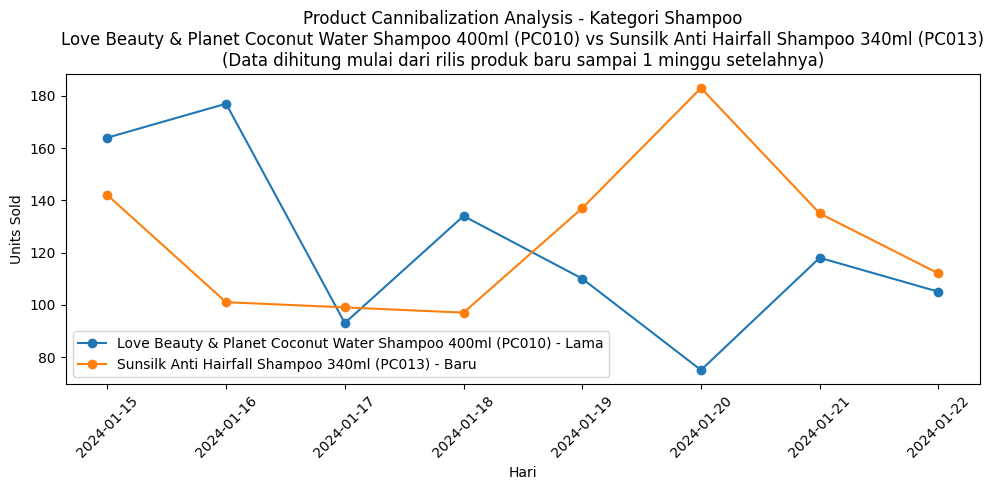

📈 Korelasi Penjualan antara PC010 dan PC013: 0.24
 Tidak ada indikasi kuat cannibalization.



In [36]:
print("====== Analisis Cannibalization Produk Tipe Shampoo ======\n")
analyze_cannibalization('PC001', 'PC009')
analyze_cannibalization('PC001', 'PC006')
analyze_cannibalization('PC001', 'PC010')
analyze_cannibalization('PC001', 'PC013')
analyze_cannibalization('PC009', 'PC006')
analyze_cannibalization('PC009', 'PC010')
analyze_cannibalization('PC009', 'PC013')
analyze_cannibalization('PC006', 'PC010')
analyze_cannibalization('PC006', 'PC013')
analyze_cannibalization('PC010', 'PC013')


### Hasil dan Analisis

Berdasarkan hasil perhitungan *Spearman Rank Correlation* terhadap pasangan produk dalam kategori Berbagai Kategori, diperoleh nilai korelasi sebagai berikut:

| No | Pasangan Produk | Nilai Korelasi (ρ) | Interpretasi |
|:--:|:----------------|:------------------:|:--------------|
| 1 | PC003 – PC014 | -0.23 | Korelasi negatif sedang  |
| 2 | PC007 – PC008 | 0.75 | Korelasi positif  |
| 3 | PC012 – PC005 | 0.10 | Korelasi lemah/tidak signifikan  |
| 4 | PC001 – PC009 | 0.21 | Korelasi positif   |
| 5 | PC001 – PC006 | -0.33 | Korelasi negatif sedang  |
| 6 | PC001 – PC010 | -0.07 | Korelasi lemah/tidak signifikan   |
| 7 | PC001 – PC013 | -0.10 | Korelasi lemah/tidak signifikan  |
| 8 | PC009 – PC006 | -0.33 | Korelasi negatif sedang |
| 9 | PC009 – PC010 | -0.69 | Korelasi negatif kuat |
| 10 | PC009 – PC013 | 0.57 | Korelasi positif |
| 11 | PC006 – PC010 | -0.24 | Korelasi negatif sedang|
| 12 | PC006 – PC013 | 0.62 | Korelasi positif |
| 13 | PC010 – PC013 | 0.24 | Korelasi positif|

---

Sebagian besar data, yaitu sebanyak 5 pasangan produk memiliki korelasi positif. Hal ini menunjukkan bahwa ketika perilisan produk baru, penjualan kedua produk cenderung mengalami kenaikan secara bersamaan. Dengan demikian tidak terdapat adanya indikasi terjadinya cannibalization antara kedua produk tersebut. 

Selanjutnya, terdapat 4 pasangan produk memiliki korelasi negatif sedang. Artinya, kedua produk memiliki hubungan yang berlawanan arah, namun tidak sepenuhnya kuat.Penurunan penjualan produk lama tidak terjadi seiring kenaikan penjualan produk baru. Meskipun demikian, pola ini tetap menandakan adanya indikasi cannibalization.

Kemudian, 3 pasangan produk memiliki korelasi lemah/tidak signifikan. Kondisi ini menunjukkan penjualan kedua produk naik-turun secara independen,sehingga kecil kemungkinan adanya indikasi cannibalization. 

Terakhir, 1 pasangan produk memiliki korelasi negatif kuat. Hal ini mengindikasikan bahwa ketika penjualan produk baru mengalami peningkatan, maka penjualan produk lama akan mengalami penurunan secara konsisten dan jelas, sehingga sangat mungkin terjadi cannibalization.



### Kesimpulan

Berdasarkan hasil analisis korelasi menggunakan metode *Spearman Rank Correlation* dalam periode satu minggu setelah perilisan produk baru, tingkat cannibalization antar produk tergolong rendah. Dari total 13 pasangan yang dianalisis, hanya 5 pasangan yang menunjukkan indikasi cannibalization.

Sebagian besar pasangan produk menunjukkan **korelasi positif** atau **korelasi lemah/tidak signifikan**, yang mengindikasikan bahwa penjualan produk lama dan produk baru cenderung meningkat bersamaan atau penjualan produk naik-turun secara independen. Dengan demikian, tidak terdapat indikasi cannibalization pada pasanan produk tersebut.

Beberapa pasangan produk lainnya menunjukkan **korelasi negatif sedang**, yang mengindikasikan penjualan produk lama dan baru memiliki hubungan yang berlawanan arah, namun tidak konsisten. Pola ini menandakan adanya indikasi cannibalization, meskipun tidak terlalu kuat.

Hanya terdapat satu pasangan produk yang menunjukkan **korelasi negatif kuat**, yaitu pasangan **PC009** dan **PC010**. Kondisi ini menandakan bahwa peningkatan penjualan produk baru secara jelas diikuti dengan penurunan penjualan produk lama, sehingga pasangan ini merupakan satu-satunya kasus cannibalization yang memerlukan perhatian lebih lanjut.




### Referensi

[1]	E. F. El-Hashash and R. H. A. Shiekh, “A Comparison of the Pearson, Spearman Rank and Kendall Tau Correlation Coefficients Using Quantitative Variables,” Asian Journal of Probability and Statistics, pp. 36–48, Oct. 2022, doi: 10.9734/ajpas/2022/v20i3425.